### Students Name and ID:
- Ali Abdoshahi/403207034
- Mobina Poulaei/403206962


# Download Data


In [2]:
system("apt-get install git -y")
system("git clone https://github.com/MobinaPoulaei/Diagnostic_markers_for_AML.git")

## Install libraries

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

install.packages("umap")
install.packages("pROC")
install.packages("Rtsne")
install.packages("enrichR")
install.packages("randomForest")

# it takes a while
BiocManager::install("sva")
BiocManager::install("limma")
BiocManager::install("DESeq2")
BiocManager::install("org.Hs.eg.db")
BiocManager::install("AnnotationDbi")
BiocManager::install("ComplexHeatmap")
BiocManager::install("clusterProfiler")

In [71]:
library(utils)
rforge <- "http://r-forge.r-project.org"
install.packages("estimate", repos=rforge, dependencies=TRUE)
library(estimate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Import libraries

In [6]:
library(sva)
library(umap)
library(pROC)
library(Rtsne)
library(dplyr)
library(limma)
library(tidyr)
library(DESeq2)
library(ggplot2)
library(forcats)
library(enrichR)
library(reshape2)
library(circlize)
library(data.table)
library(org.Hs.eg.db)
library(randomForest)
library(AnnotationDbi)
library(ComplexHeatmap)
library(clusterProfiler)

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.

Loading required package: genefilter

Loading required package: BiocParallel

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var



Attaching package: ‘dplyr’


The following object is masked from ‘package:nlme’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:pROC’:

    var


Th

# Read the Data sets


In [7]:
# GSE24395 non-normalized
data24 <- fread("Diagnostic_markers_for_AML/data/GSE24395.txt", skip = "GSM601391	SAMPLE 17")
data1 <- data24[,-"Detection Pval"]
sample_names = fread("Diagnostic_markers_for_AML/data/GSE24395.txt", nrows = 17, header = FALSE)
colnames(data1)[-1] <- sample_names$V1

In [8]:
head(data1)

ID_REF,GSM601375,GSM601376,GSM601377,GSM601378,GSM601379,GSM601380,GSM601381,GSM601382,GSM601383,GSM601384,GSM601385,GSM601386,GSM601387,GSM601388,GSM601389,GSM601390,GSM601391
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4760445,33.4,31.4,36.5,31.4,29.9,31.3,28.5,29.2,31.2,31.2,26.0,30.8,40.5,34.6,42.4,35.0,33.6
2760372,44.3,40.3,46.6,46.7,40.6,39.4,42.3,40.6,42.5,36.8,36.0,37.8,44.5,40.1,52.3,56.7,44.0
630309,176.0,121.7,143.2,168.0,127.3,127.3,249.5,124.0,126.3,48.0,357.9,232.0,82.2,117.8,122.2,46.8,92.7
5080372,36.1,40.2,37.0,37.6,39.5,32.7,33.8,32.3,33.6,31.5,31.2,34.6,38.7,41.7,43.2,40.4,34.1
1230195,33.3,32.1,32.4,32.4,32.7,28.5,29.1,27.6,28.7,25.8,23.1,26.1,30.4,35.6,32.2,36.8,33.6
2100719,39.7,46.7,45.9,38.0,46.2,45.8,37.3,37.9,40.8,38.2,28.1,36.2,47.1,48.5,47.1,45.6,46.6


In [9]:
# GSE30029 non-nomalized
data300 <- read.delim("Diagnostic_markers_for_AML/data/GSE30029.txt")
data2 <- data300[, !grepl("^Detection.Pval", colnames(data300))]
col_names <- read.delim("Diagnostic_markers_for_AML/data/GSE30029_series_matrix.txt", comment.char = "!")
colnames(data2) <- colnames(col_names)
data2[,-1] <- backgroundCorrect(data2[,-1], method="normexp", offset=20)

Array 1 corrected
Array 2 corrected
Array 3 corrected
Array 4 corrected
Array 5 corrected
Array 6 corrected
Array 7 corrected
Array 8 corrected
Array 9 corrected
Array 10 corrected
Array 11 corrected
Array 12 corrected
Array 13 corrected
Array 14 corrected
Array 15 corrected
Array 16 corrected
Array 17 corrected
Array 18 corrected
Array 19 corrected
Array 20 corrected
Array 21 corrected
Array 22 corrected
Array 23 corrected
Array 24 corrected
Array 25 corrected
Array 26 corrected
Array 27 corrected
Array 28 corrected
Array 29 corrected
Array 30 corrected
Array 31 corrected
Array 32 corrected
Array 33 corrected
Array 34 corrected
Array 35 corrected
Array 36 corrected
Array 37 corrected
Array 38 corrected
Array 39 corrected
Array 40 corrected
Array 41 corrected
Array 42 corrected
Array 43 corrected
Array 44 corrected
Array 45 corrected
Array 46 corrected
Array 47 corrected
Array 48 corrected
Array 49 corrected
Array 50 corrected
Array 51 corrected
Array 52 corrected
Array 53 corrected
Ar

In [10]:
head(data2)

,ID_REF,GSM743072,GSM743073,GSM743074,GSM743075,GSM743076,GSM743077,GSM743078,GSM743079,GSM743080,⋯,GSM743183,GSM743184,GSM743185,GSM743186,GSM743187,GSM743188,GSM743189,GSM743190,GSM743191,GSM743192
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ILMN_1762337,23.46796,33.01580,30.18026,32.95821,41.8868,29.50073,26.62955,28.66372,33.04713,⋯,37.28892,54.66294,50.50186,36.38842,43.36401,48.24428,43.3518,35.97173,32.05435,50.439
2,ILMN_2055271,54.97177,20.59286,52.08026,59.15821,35.0868,37.10073,38.32819,29.46372,42.14713,⋯,35.98892,43.56294,49.00186,43.58842,38.56401,33.64428,40.8518,44.57173,24.67871,38.839
3,ILMN_1736007,27.47181,39.41580,34.28026,29.35821,42.3868,43.20073,38.52819,30.66372,31.14713,⋯,47.98892,40.36294,39.60186,26.29304,36.06401,29.44428,37.0518,65.47173,39.15435,40.539
4,ILMN_2383229,51.57177,36.01580,27.38050,42.95821,35.3868,32.50073,31.62819,29.36372,34.74713,⋯,25.88904,44.56294,54.10186,33.78842,32.76401,36.54428,33.3518,41.17173,30.35435,42.739
5,ILMN_1806310,34.97177,36.11580,25.68671,34.45821,38.6868,38.60073,31.72819,28.66372,31.94713,⋯,30.38892,42.46294,35.10186,45.18842,46.46401,33.94428,42.0518,53.77173,36.35435,31.339
6,ILMN_1779670,37.47177,38.01580,48.48026,37.35821,51.6868,31.00073,33.32819,35.66372,33.34713,⋯,36.38892,47.46294,39.80186,38.88842,41.36401,39.94428,32.7518,59.17173,29.85435,50.439


In [11]:
# Annotation files based on the Sequencing system
annot24 <- fread("Diagnostic_markers_for_AML/data/GPL6106-11578.txt", skip = "#Synonym = ")
annot300 <- fread("Diagnostic_markers_for_AML/data/GPL6947-13512.txt", skip = "#GB_ACC = ")

In [12]:
# Select commen columns between annotation and data sets
annot1 <- annot24[,c("ID", "Symbol")]
annot2 <- annot300[,c("ID", "Symbol")]
annot2 <- na.omit(annot2)

In [13]:
# Merge datasets and their related annotations based on the ID columns
data1 <- merge(data1, annot1[, .(ID, Symbol)], by.x = "ID_REF", by.y = "ID", all.x = TRUE)
data2 <- merge(data2, annot2[, .(ID, Symbol)], by.x = "ID_REF", by.y = "ID", all.x = TRUE)

In [14]:
# Remove Blanck Symbol values ---> is it a good choise?
data1 <- data1[rowSums(data1 == "", na.rm = TRUE) == 0, ]
data2 <- data2[rowSums(data2 == "", na.rm = TRUE) == 0, ]

In [15]:
# Remove ID_REF columns
data1 <- data1[,-1]
data2 <- data2[,-1]

In [16]:
# Aggregate replicated Symbol based on mean
data1 <- aggregate(.~Symbol, data1, mean)
data2 <- aggregate(.~Symbol, data2, mean)

In [17]:
head(data1)

,Symbol,GSM601375,GSM601376,GSM601377,GSM601378,GSM601379,GSM601380,GSM601381,GSM601382,GSM601383,GSM601384,GSM601385,GSM601386,GSM601387,GSM601388,GSM601389,GSM601390,GSM601391
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15E1.2,55.10000,95.10000,90.4,63.6,114.60000,130.8,95.30000,104.10000,102.4,58.4,38.70000,76.7,75.20000,75.00000,63.30000,46.20000,77.90000
2,2'-PDE,86.80000,197.30000,228.9,201.6,163.70000,178.8,129.20000,183.30000,289.4,147.8,188.00000,243.8,95.50000,44.20000,89.00000,59.40000,155.30000
3,76P,92.30000,206.10000,262.1,103.5,160.00000,222.3,86.70000,255.00000,272.7,220.9,248.90000,335.4,130.30000,73.60000,151.40000,124.90000,141.80000
4,7A5,43.90000,56.20000,38.7,34.2,31.60000,34.3,32.40000,30.90000,33.2,77.6,27.00000,59.5,37.80000,57.70000,39.20000,33.50000,33.00000
5,A1BG,39.20000,50.80000,37.8,39.7,41.30000,43.0,30.90000,52.50000,37.9,25.7,45.10000,43.9,44.30000,37.90000,46.50000,35.70000,56.00000
6,A2BP1,41.23333,42.56667,41.0,39.6,41.86667,42.7,36.13333,32.83333,35.4,36.7,29.13333,36.9,42.76667,42.56667,42.33333,41.86667,43.23333


In [18]:
head(data2)

,Symbol,GSM743072,GSM743073,GSM743074,GSM743075,GSM743076,GSM743077,GSM743078,GSM743079,GSM743080,⋯,GSM743183,GSM743184,GSM743185,GSM743186,GSM743187,GSM743188,GSM743189,GSM743190,GSM743191,GSM743192
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7A5,23.46796,33.01580,30.18026,32.95821,41.88680,29.50073,26.62955,28.66372,33.04713,⋯,37.28892,54.66294,50.50186,36.38842,43.36401,48.24428,43.3518,35.97173,32.05435,50.43900
2,A1BG,41.22179,30.00433,43.18026,44.25821,38.73680,40.15073,38.42819,30.06372,36.64713,⋯,41.98892,41.96294,44.30186,34.94073,37.31401,31.54428,38.9518,55.02173,31.91653,39.68900
3,A1CF,41.33844,36.71580,33.84916,38.25821,41.92013,34.03406,32.22819,31.23039,33.34713,⋯,30.88896,44.82961,43.00186,39.28842,40.19734,36.81095,36.0518,51.37173,32.18768,41.50566
4,A26A1,42.27177,29.71586,37.63026,42.15821,38.53680,36.65073,28.77887,28.91372,39.19713,⋯,45.93892,38.41294,61.15186,50.68842,35.81401,32.94429,51.1018,43.27173,39.40435,42.78900
5,A26B1,49.87177,34.81580,33.68026,43.75821,39.28680,48.10073,31.12819,31.06372,39.64713,⋯,40.38892,35.06294,25.43369,46.98842,54.46401,61.94428,49.9518,42.47173,33.35435,36.23900
6,A26C1B,39.97177,42.41580,39.88026,47.75821,44.68680,27.10077,45.22819,36.66372,41.44713,⋯,30.18892,35.76294,40.00186,33.58842,48.36401,50.74428,48.2518,47.87173,32.35435,56.73900


# Screening of differentially expressed genes

In [19]:
# Apply log2 transformation (log2(1 + x)) to all numeric columns except the first one
data1[,-1] <- log2(1 + data1[,-1])
data2[,-1] <- log2(1 + data2[,-1])

In [20]:
# Merge data sets by the "Symbol" column
all_data <- merge(data1, data2, "Symbol")
# Set row names of all_data to the "Symbol" column for easier indexing
rownames(all_data) <- all_data$Symbol
all_data[,-1] <- normalizeQuantiles(all_data[,-1])
all_data$Symbol <- NULL

## Remove batch effects

In [21]:
# Create a batch factor for batch effect correction
batch <- factor(c(rep(1, ncol(data1)-1), rep(2, ncol(data2)-1)))

In [22]:
# Define sample groups (AML = Acute Myeloid Leukemia, Normal = Control)
gr <- factor(c(rep('AML', 12), rep("Normal", 5),
              rep("AML", 2), "Normal", rep("AML", 5), "Normal",
              rep("AML", 10), "Normal", "AML", "Normal", "AML",
              rep("Normal", 2), rep("AML", 3), "Normal", rep("AML", 9), "Normal",
              rep("AML", 2), "Normal", rep("AML", 5), "Normal", "AML", "Normal", "AML",
              rep("Normal", 2),rep("AML", 4), "Normal", rep("AML", 14),rep("Normal", 2), "AML",
              rep("Normal", 5), "AML", rep("Normal", 5), rep("AML", 9), "Normal", rep("AML", 9), "Normal",
              rep("AML", 2),rep("Normal", 2), rep("AML", 8), "Normal", rep("AML", 2)))

# Create a design matrix (data frame) that maps each sample to its condition
design <- data.frame(condition = gr, row.names = colnames(all_data))

# Extract sample names for Normal and AML groups separately
normal_samples <- rownames(design)[design$condition == 'Normal']
aml_samples <- rownames(design)[design$condition == 'AML']

In [23]:
# Apply ComBat function to remove batch effects from gene expression data
allc <- ComBat(all_data, batch) # 'batch' indicates which batch each sample belongs to

# Convert the result into a data frame for easier manipulation
allc <- as.data.frame(allc)

Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




## Box Plot

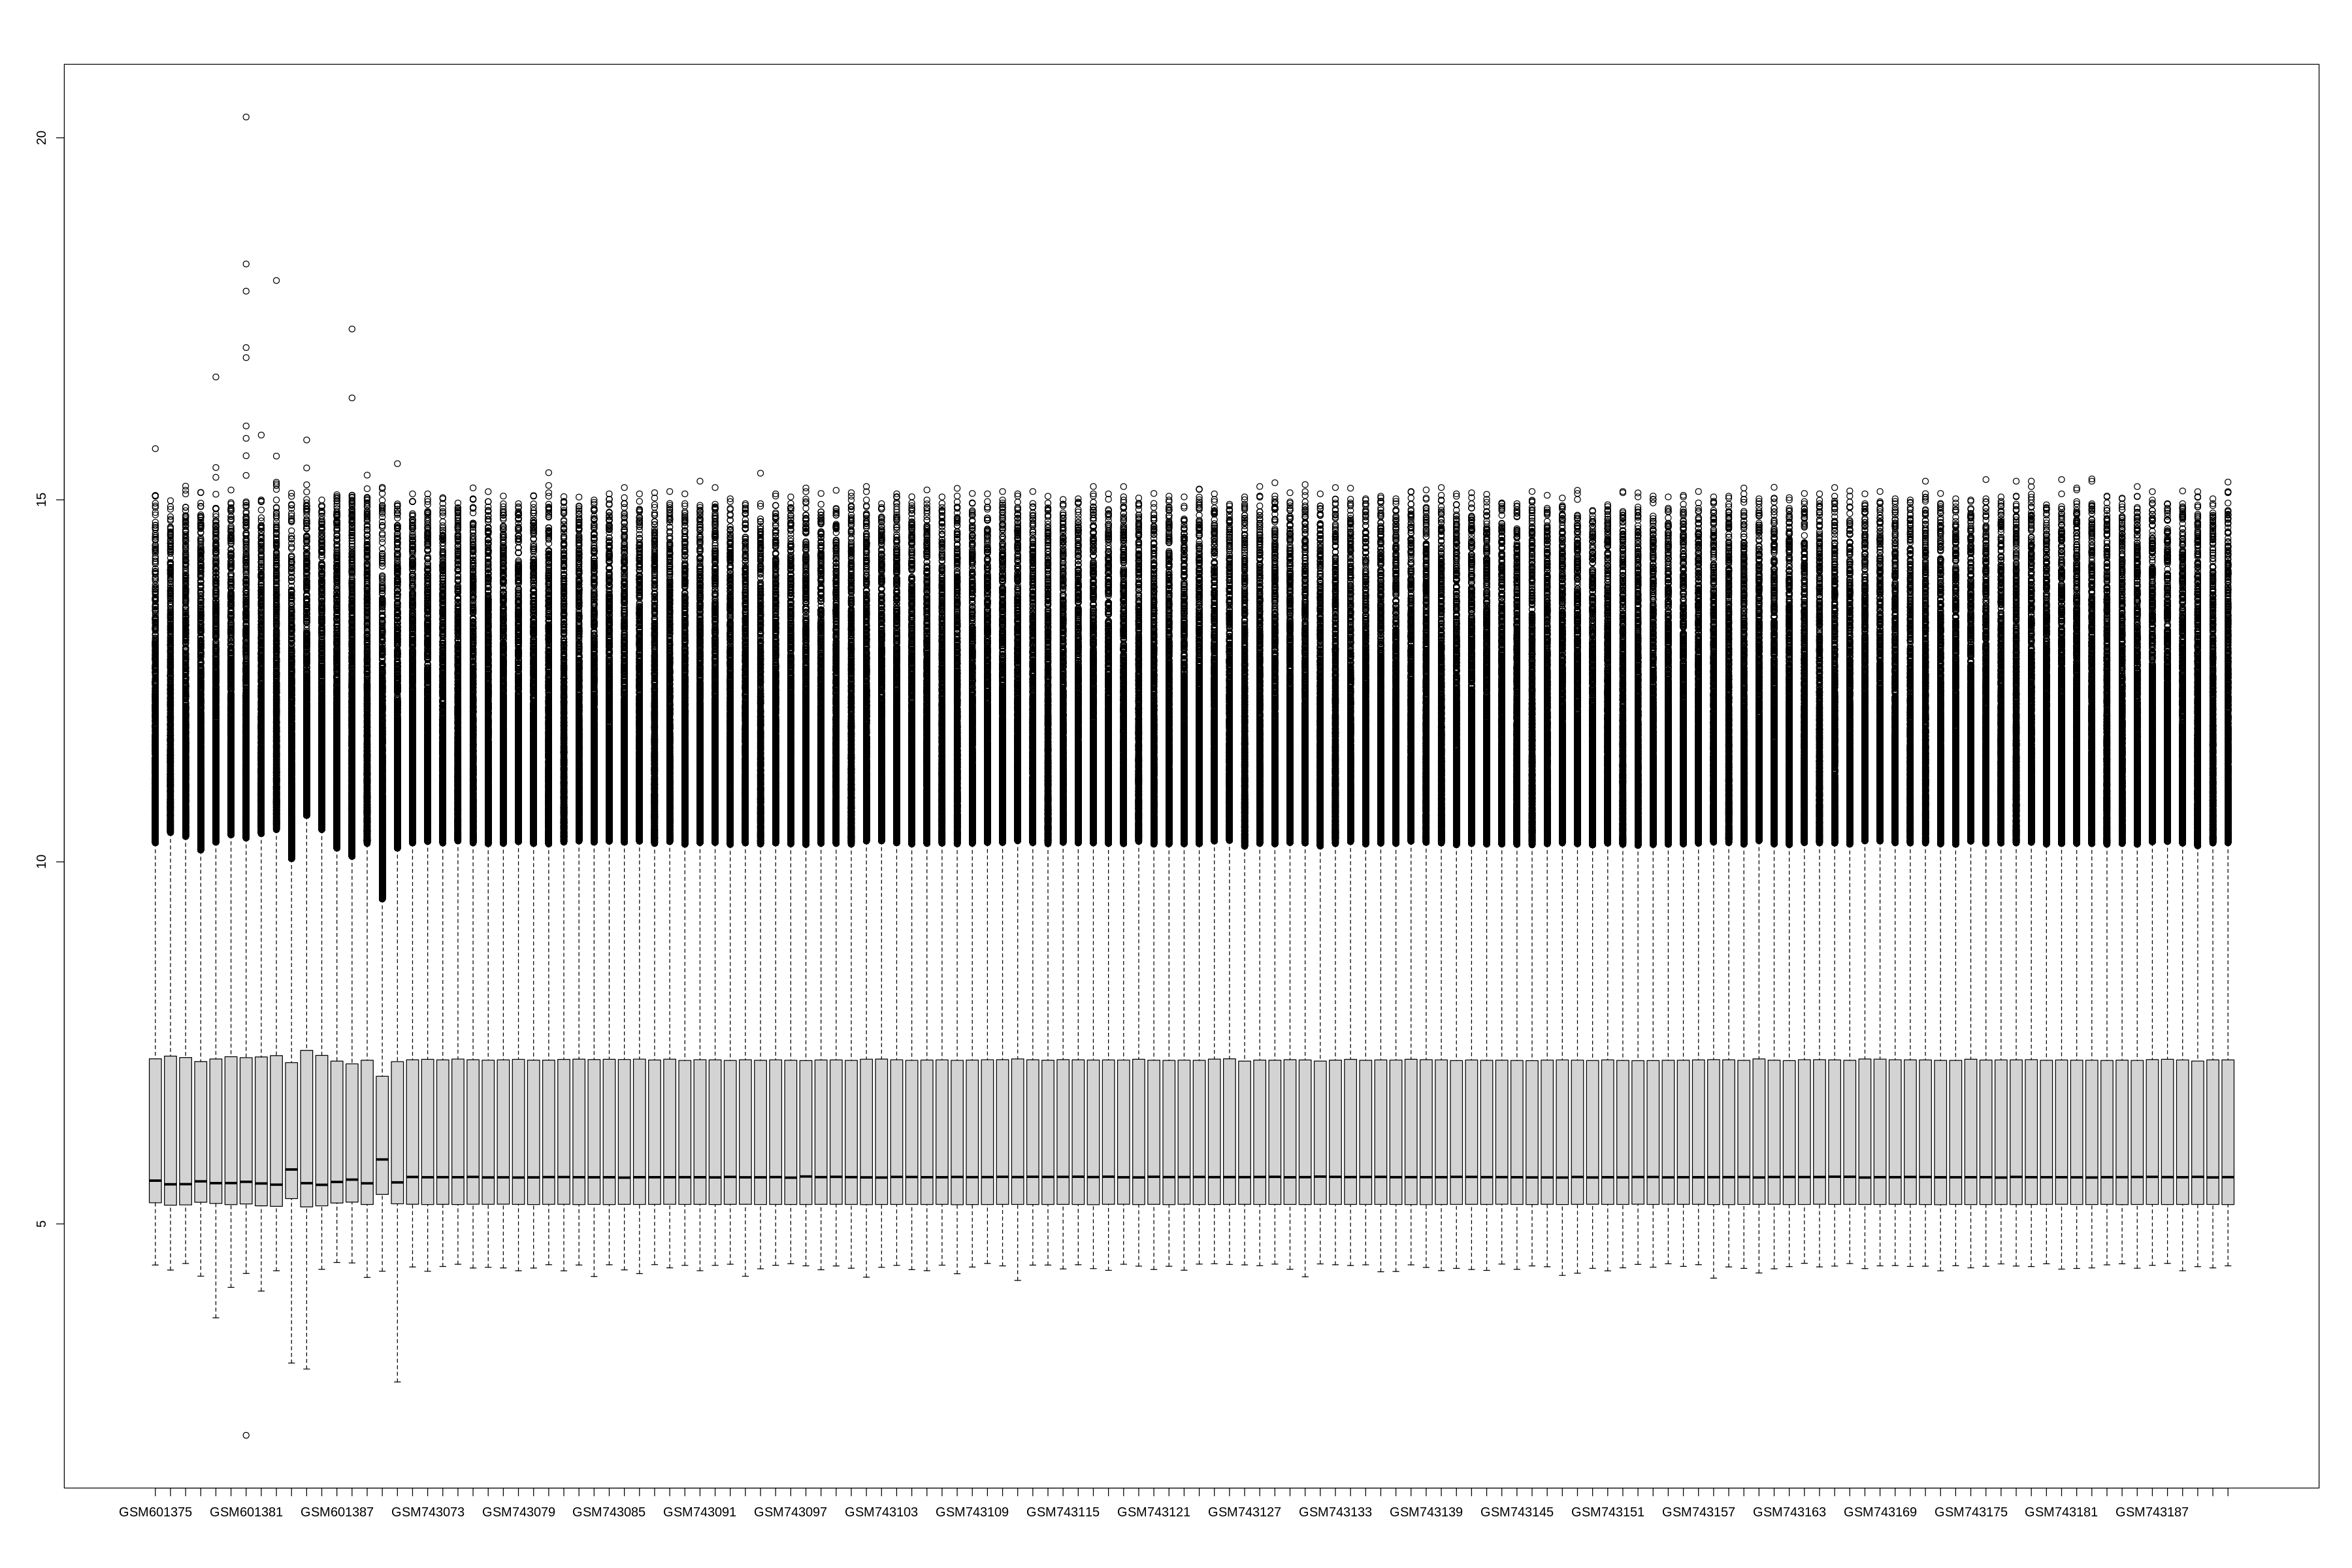

In [24]:
options(repr.plot.width = 30, repr.plot.height = 20)
boxplot(allc)

## PCA plot

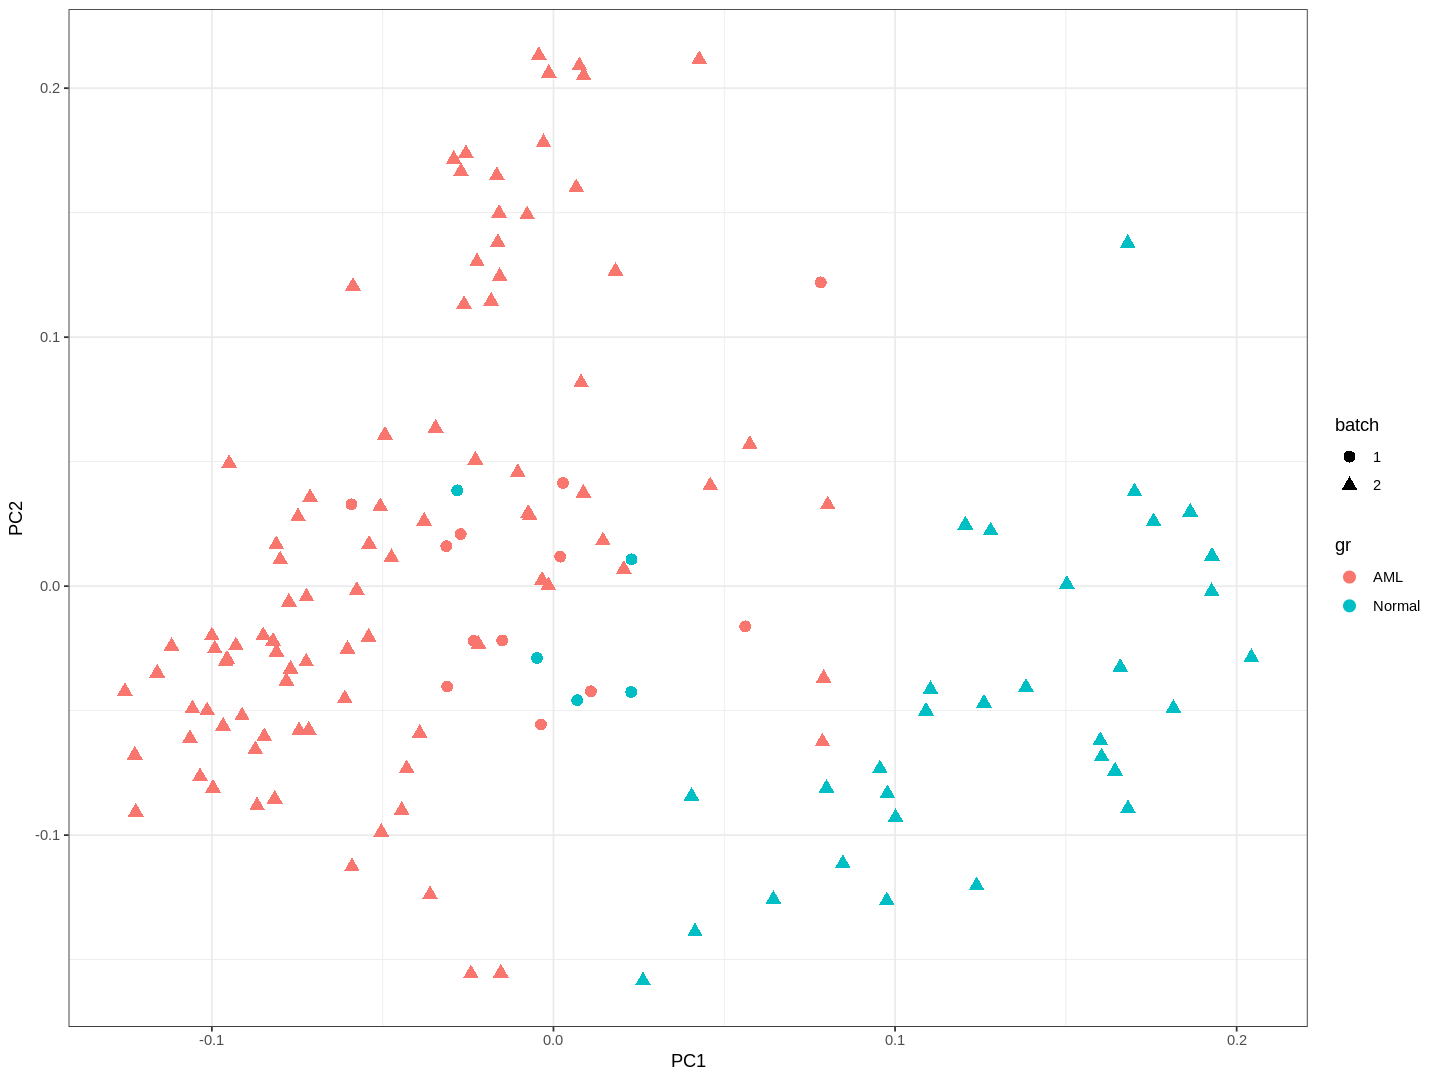

In [25]:
all_pca = allc - rowMeans(allc)
pc <- prcomp(all_pca)
pcr <- data.frame(pc$r[,1:3], batch, gr)

options(repr.plot.width = 12, repr.plot.height = 9)
ggplot(pcr, aes(PC1, PC2, colour = gr, shape = batch)) + geom_point(size=3) + theme_bw()

## UMAP plot

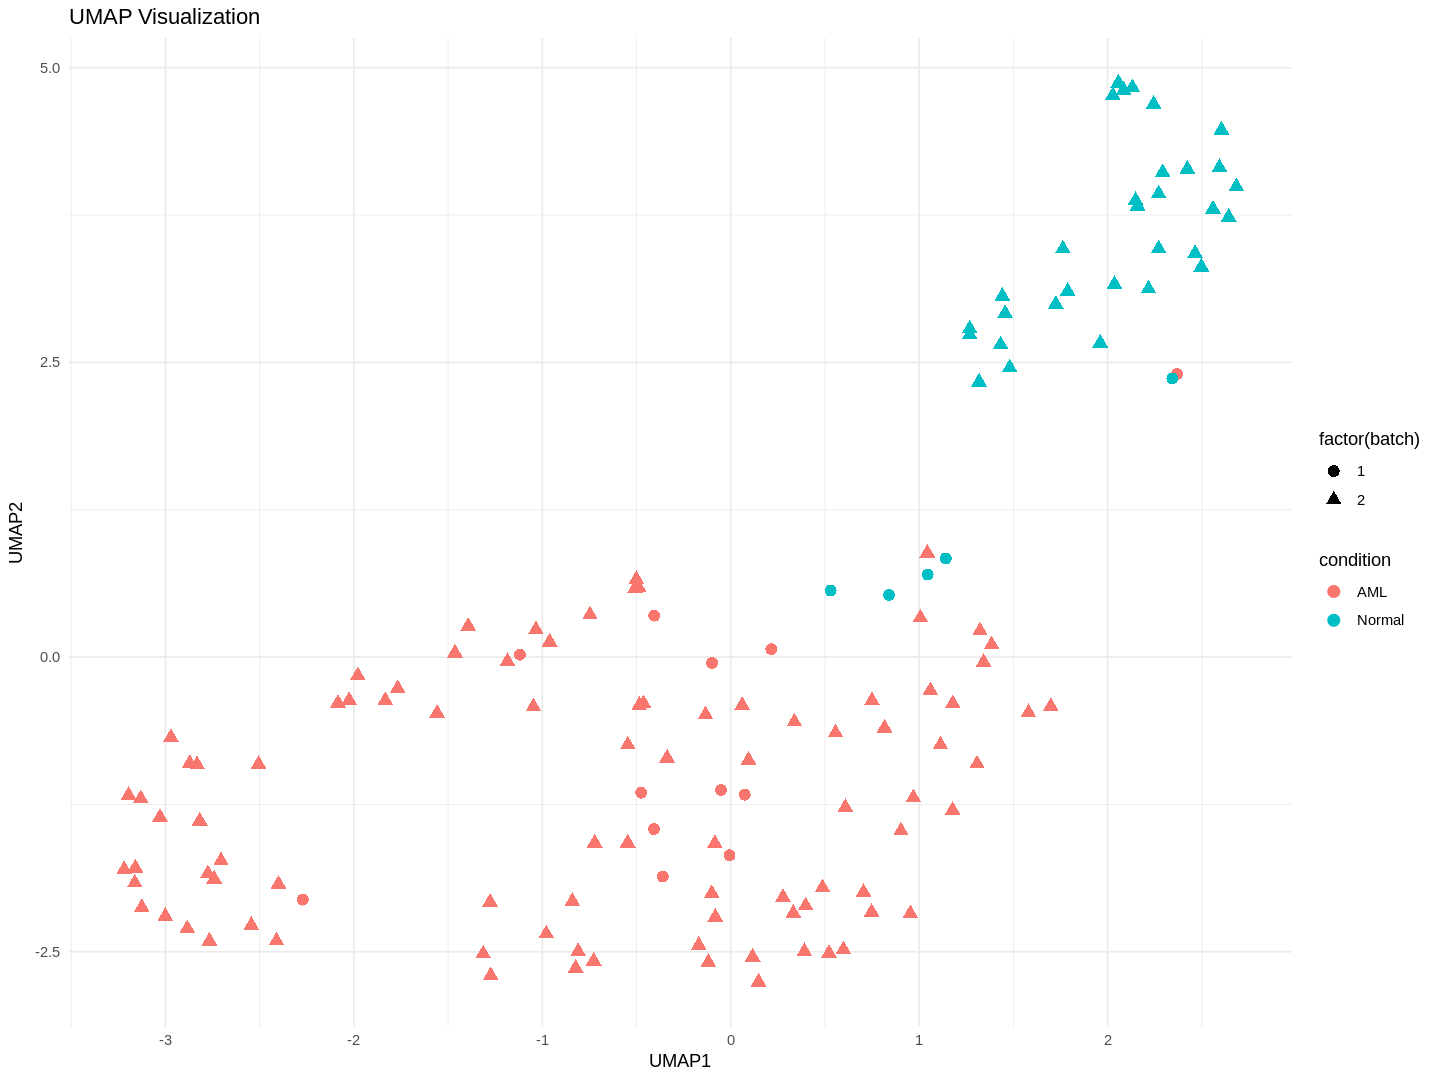

In [26]:
data_for_umap <- t(allc)
umap_result <- umap(data_for_umap)
umap_df <- data.frame(UMAP1 = umap_result$layout[,1], UMAP2 = umap_result$layout[,2],
                      batch = batch, condition = gr)

# Plot UMAP
ggplot(umap_df, aes(x = UMAP1, y = UMAP2, color = condition, shape = factor(batch))) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(title = "UMAP Visualization")

## tSNE plot

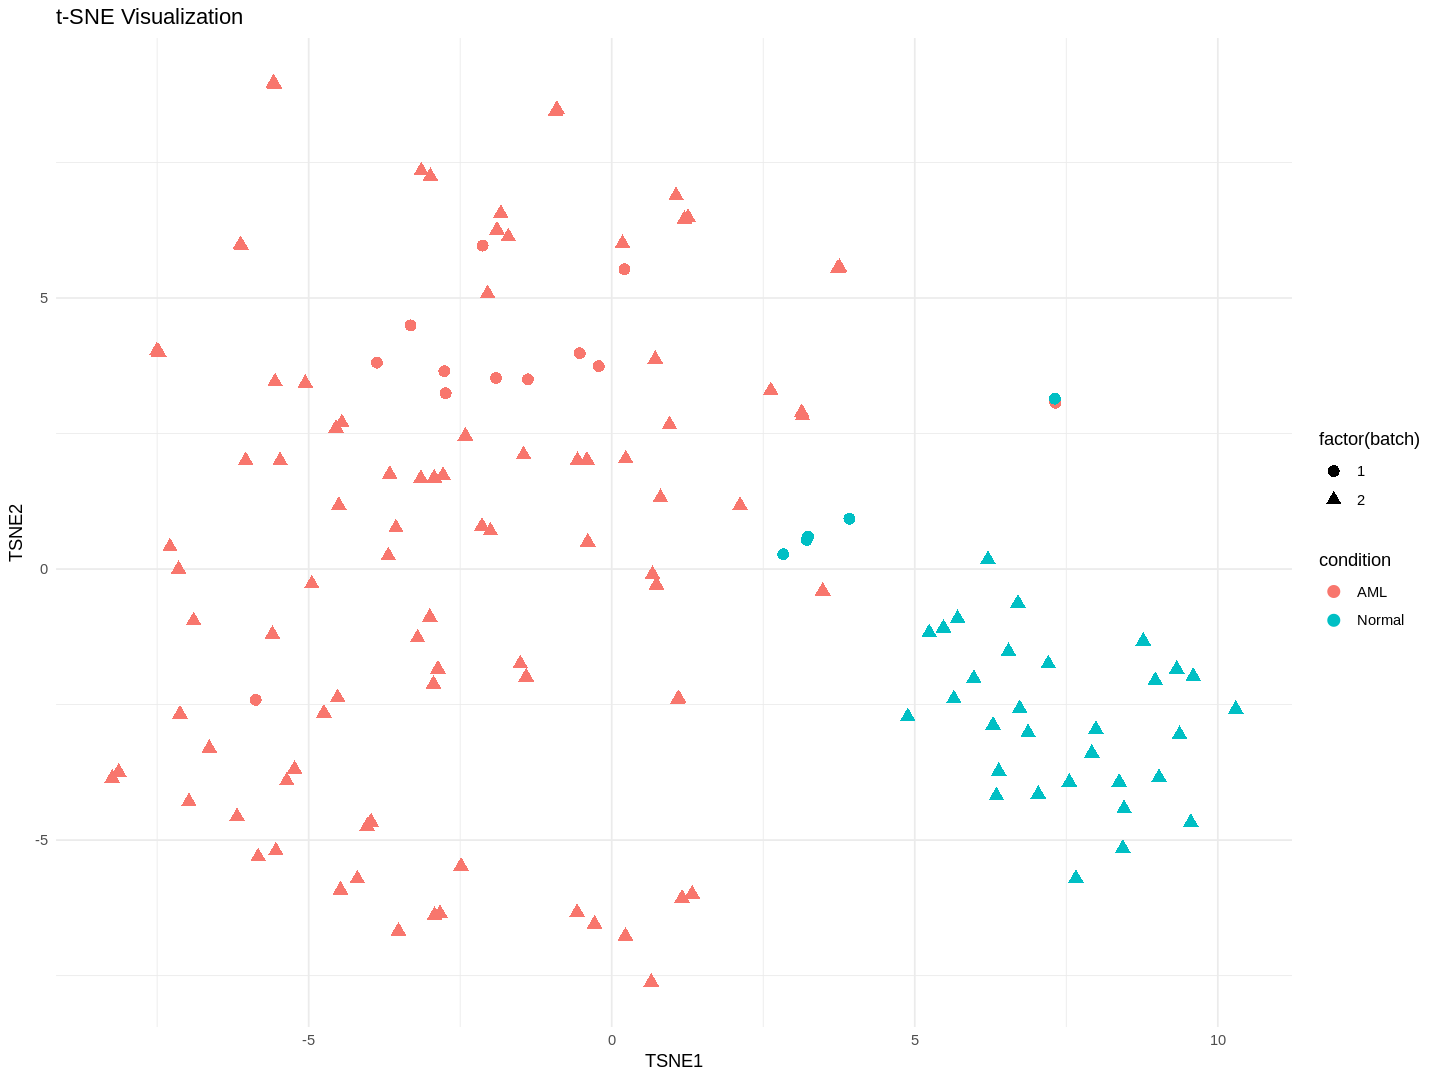

In [27]:
data_for_tsne <- t(allc)
tsne_result <- Rtsne(data_for_tsne, perplexity = 30)
tsne_df <- data.frame(TSNE1 = tsne_result$Y[,1], TSNE2 = tsne_result$Y[,2],
                      batch = batch, condition = gr)

# Plot t-SNE
ggplot(tsne_df, aes(x = TSNE1, y = TSNE2, color = condition, shape = factor(batch))) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(title = "t-SNE Visualization")

## Screening with Limma package

In [28]:
# Create design matrix for differential expression analysis
design1 <- model.matrix(~0 + gr)
colnames(design1) <- levels(gr)

# Fit linear model to the expression data
fit <- lmFit(allc, design1)

# Define contrast matrix to compare AML vs. Normal
contrast_matrix <- makeContrasts(AML - Normal, levels = design1)

# Apply contrast fit
fit2 <- contrasts.fit(fit, contrast_matrix)

# Apply empirical Bayes method for variance shrinkage
fit2 <- eBayes(fit2)

# Extract differentially expressed genes (DEGs) with adjusted p-value and log fold change
deg_results <- topTable(fit2, coef = 1, adjust = "BH", number = Inf)

# Filter significant DEGs with adjusted p-value < 0.01 and absolute log fold change > 2
deg_filtered <- deg_results[deg_results$adj.P.Val < 0.01 & abs(deg_results$logFC) > 2, ]

## MD plot

A Mean-Difference (MD) Plot, also known as an MA Plot, is commonly used in gene expression analysis to visualize the relationship between the mean expression and the log-fold changes of genes. It helps in identifying differentially expressed genes (DEGs) while accounting for variability across expression levels.




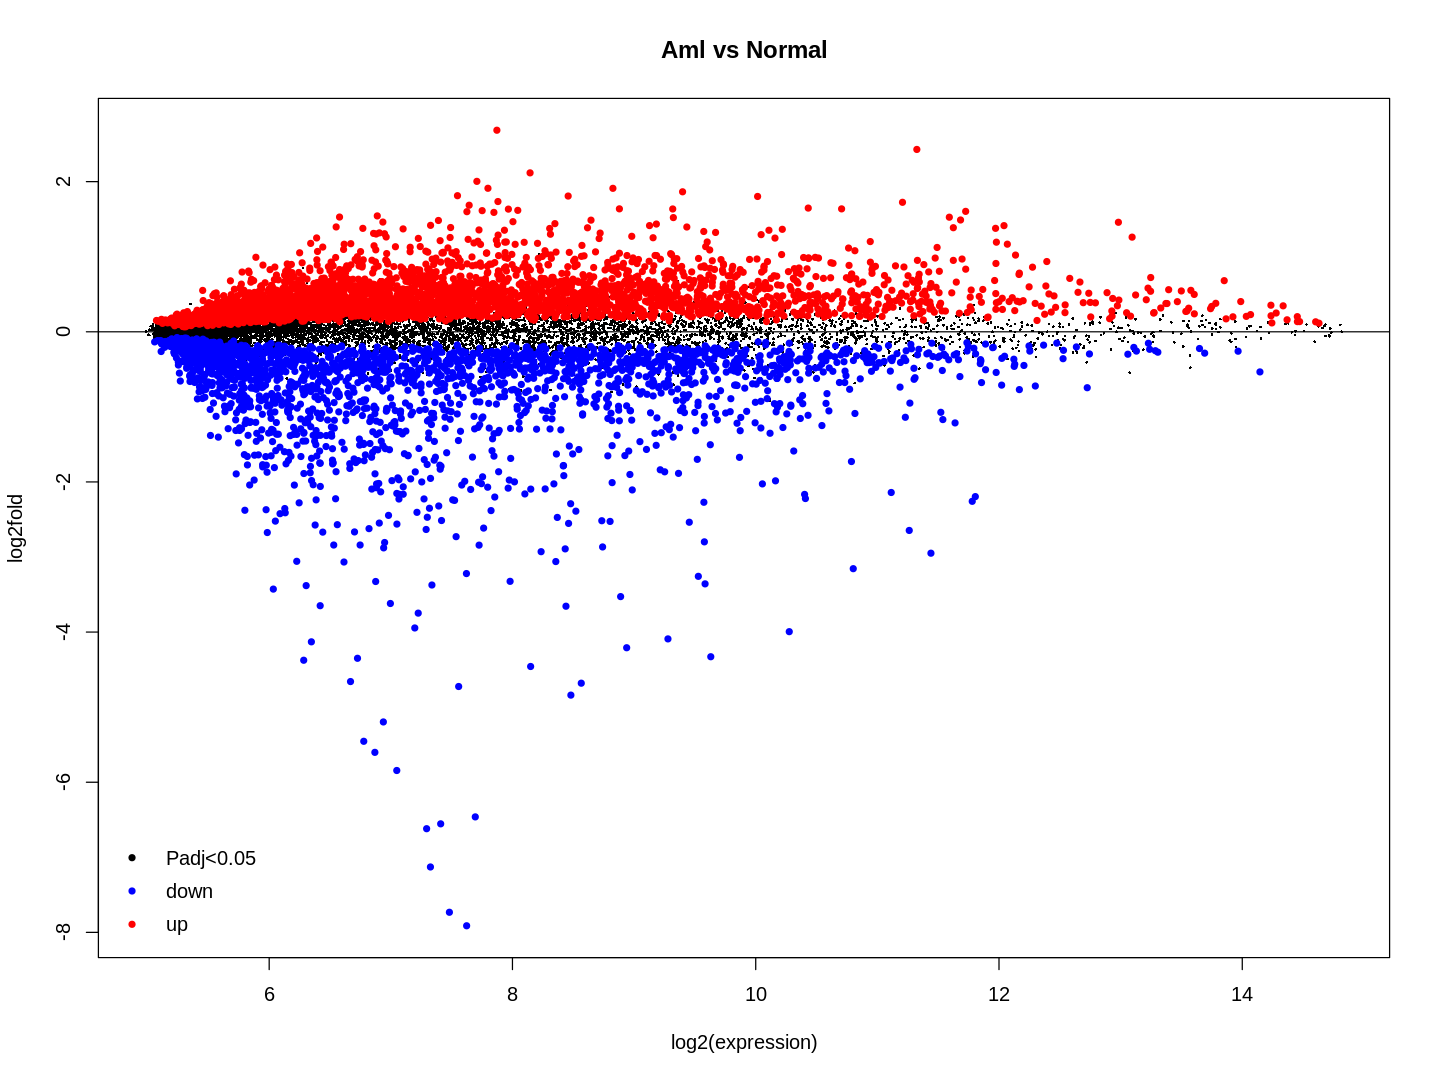

In [29]:
# MD plot (log fold change vs mean log expression)
ct <- 1
dT <- decideTests(fit2, adjust.method="fdr", p.value=0.05, lfc=0)

plotMD(fit2, column=ct, status=dT[,ct], legend=FALSE, pch=20, cex=1,
       xlab="log2(expression)", ylab="log2fold", main="Aml vs Normal")
abline(h=0)

# Add custom legend
legend("bottomleft", legend=c("Padj<0.05", "down", "up"),
       pch=20, col=c("black", "blue", "red"), bty="n")

### Key Features of an MD Plot
- Genes with high fold changes (differentially expressed genes, DEGs) appear as points far from Y = 0.
- Genes with low expression levels have higher variability (due to low read counts in RNA-seq).
- A symmetric distribution around Y = 0 suggests a well-normalized dataset.
Outliers represent significantly upregulated or downregulated genes that may be biologically relevant.

## Calculate P value, Adj. P value and Log2FC

In [30]:
# Compute the average gene expression across normal & AML samples
allc$normal_Mean <- rowMeans(allc[, normal_samples], na.rm = TRUE)
allc$aml_Mean <- rowMeans(allc[, aml_samples], na.rm = TRUE)

# Calculate Log2 Fold Change (Log2FC) between AML and Normal groups
allc$Log2FoldChange <- allc$aml_Mean - allc$normal_Mean

# Perform a t-test for each gene to determine if its expression is significantly different between AML and Normal groups
p_values <- apply(allc[, c(normal_samples, aml_samples)], 1, function(x) {t.test(x[normal_samples], x[aml_samples])$p.value})

# Store the computed p-values in the data frame
allc$P_Value <- p_values

# Adjust p-values using the Benjamini-Hochberg (BH) method to control the false discovery rate (FDR)
allc$FDR <- p.adjust(allc$P_Value, method = "BH")

## Volcano plot

A volcano plot is a key visualization tool in differential gene expression analysis. It helps identify significantly upregulated and downregulated genes based on their fold change and statistical significance.

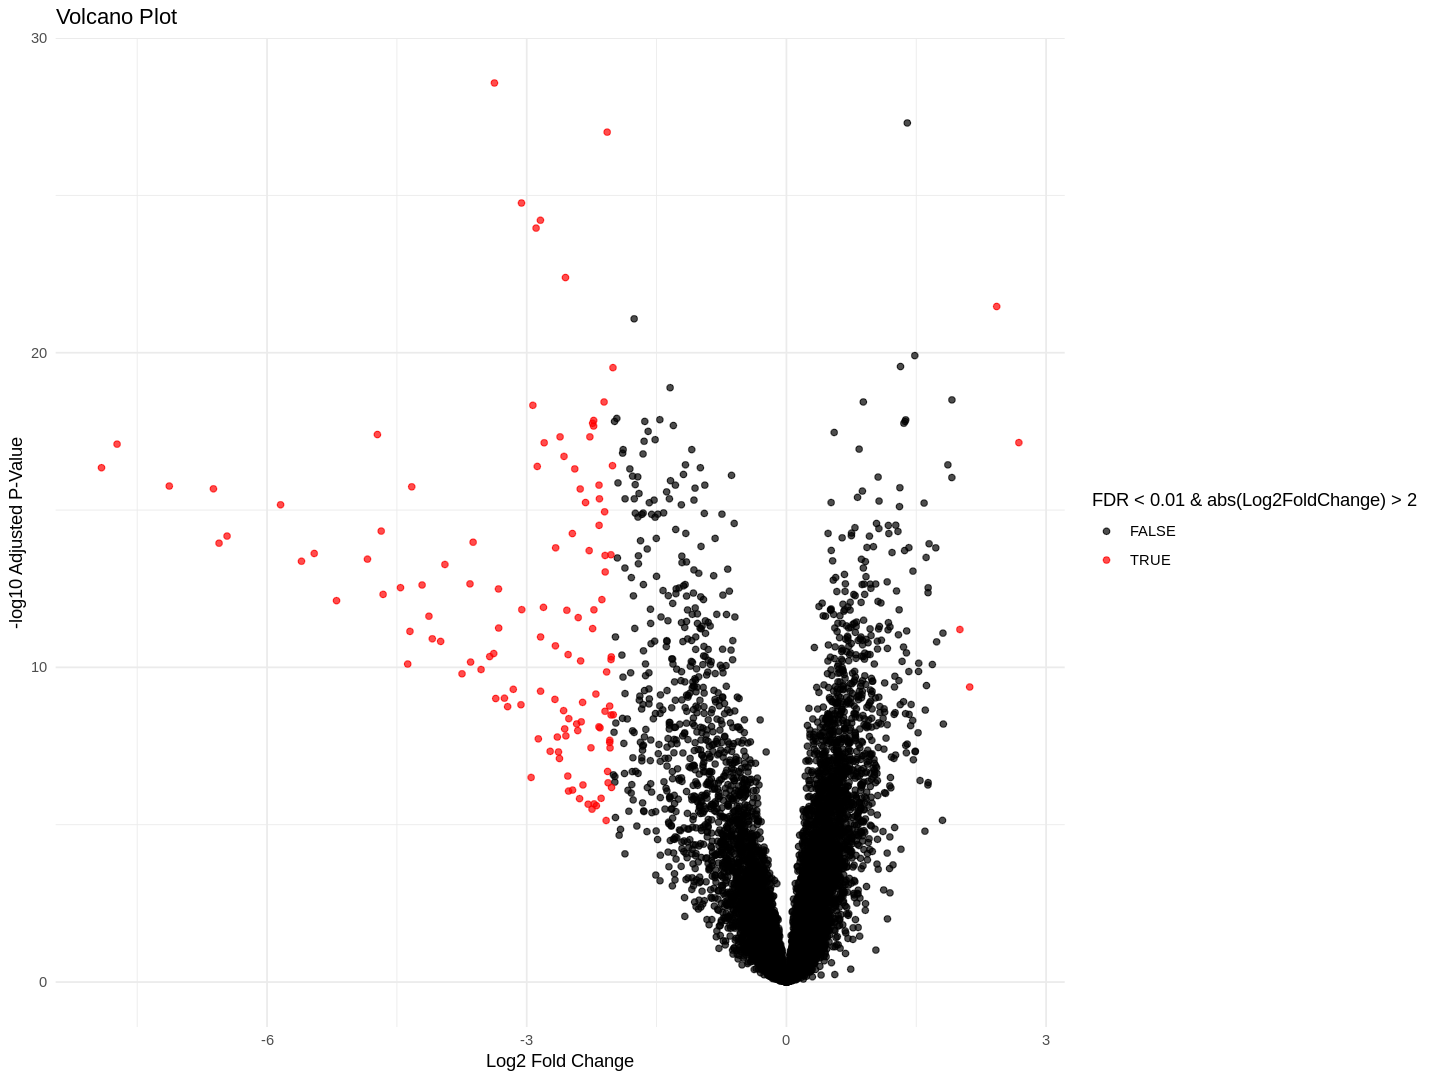

In [31]:
# Create a volcano plot to visualize DEGs
ggplot(allc, aes(x = Log2FoldChange, y = -log10(FDR))) +
  geom_point(aes(color = FDR < 0.01 & abs(Log2FoldChange) > 2), alpha = 0.7) +
  scale_color_manual(values = c("black", "red")) +
  labs(title = "Volcano Plot", x = "Log2 Fold Change", y = "-log10 Adjusted P-Value") +
  theme_minimal()

### Understanding the Volcano Plot
- X-axis (Log2 Fold Change, LFC)

 - Represents the magnitude of gene expression change.
 - Positive values: Upregulated genes.
 - Negative values: Downregulated genes.

- Y-axis (-Log10 Adjusted p-value or p-value)
 - Represents the statistical significance of differential expression.
 - Higher values indicate stronger evidence against the null hypothesis.
 - Adjusted p-values (e.g., FDR-corrected) are preferred to control for false discoveries.

## Select Differentially Expressed Genes

In [32]:
# Select DEGs set based on the condition: |Log2FC| > 2 & FDR < 0.01
df_DEGs <- allc[allc$FDR < 0.01 & abs(allc$Log2FoldChange) > 2, ]
analys_DEGs <- df_DEGs[, (ncol(df_DEGs)-4):ncol(df_DEGs)]
df_DEGs <- df_DEGs[, 1:(ncol(df_DEGs)-5)]


In [33]:
head(df_DEGs, 5)

,GSM601375,GSM601376,GSM601377,GSM601378,GSM601379,GSM601380,GSM601381,GSM601382,GSM601383,GSM601384,⋯,GSM743183,GSM743184,GSM743185,GSM743186,GSM743187,GSM743188,GSM743189,GSM743190,GSM743191,GSM743192
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALAS2,8.242718,8.167293,8.178867,8.340562,8.389959,8.152729,8.621253,8.403174,8.241129,9.688128,⋯,6.059154,7.854667,5.311610,8.175504,10.099722,10.697875,7.422977,10.271266,9.356224,5.412078
ALDH1A1,6.523182,6.725047,6.784738,6.576542,6.367951,6.273290,7.105931,6.396810,8.337473,6.485942,⋯,5.096593,6.614109,6.283452,10.869366,5.871162,5.055541,11.559118,9.657564,5.939819,7.503603
ANXA3,5.624303,5.524299,5.161695,5.749714,5.454197,5.584984,5.646552,5.192807,6.273637,5.543628,⋯,5.578992,4.662373,4.835537,5.047334,5.749295,5.314029,5.721533,8.198475,5.107301,5.089840
APOC1,5.991747,6.061146,6.169464,6.334850,6.688819,6.110509,6.789908,5.757218,6.138784,6.900778,⋯,5.603179,8.088050,4.797113,5.920205,5.419560,5.312265,6.980931,9.603831,5.258398,5.195513
APOE,7.438596,6.285121,6.123486,6.269276,7.125062,7.058121,7.528655,7.268429,10.324137,5.772671,⋯,5.919753,6.701189,4.914108,7.210072,6.182421,5.450109,7.832344,10.784208,5.153032,5.358481


In [34]:
head(analys_DEGs, 5)

,normal_Mean,aml_Mean,Log2FoldChange,P_Value,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALAS2,10.171403,7.881014,-2.290390,1.458921e-07,2.238201e-06
ALDH1A1,9.163265,6.924780,-2.238484,2.021143e-21,1.746955e-18
ANXA3,7.348030,5.307245,-2.040785,7.189194e-10,2.074106e-08
APOC1,8.459208,5.889836,-2.569372,3.947614e-20,1.971025e-17
APOE,9.671514,6.052244,-3.619271,5.854191e-17,1.054186e-14


In [35]:
# Print the number of DEGs and samples
print(paste('The number of DEGs:', dim(df_DEGs)[1]))
print(paste('The number of samples:', dim(df_DEGs)[2]))

[1] "The number of DEGs: 127"
[1] "The number of samples: 138"


In [36]:
# Up and Down regulated genes
up_DEGs <- analys_DEGs[analys_DEGs$FDR < 0.01 & analys_DEGs$Log2FoldChange > 2, ]
down_DEGs <- analys_DEGs[analys_DEGs$FDR < 0.01 & analys_DEGs$Log2FoldChange < -2, ]

print(paste('Upregulated', dim(up_DEGs)[1]))
print(paste('Downregulated', dim(down_DEGs)[1]))

[1] "Upregulated 4"
[1] "Downregulated 123"


## Heat Map

The heatmap is showing you how the set of DEGs behaves across your different experimental samples or conditions. It helps in identifying patterns, such as which genes are co-regulated or specific to a particular condition, thereby offering insights into the biological processes that might be at play.

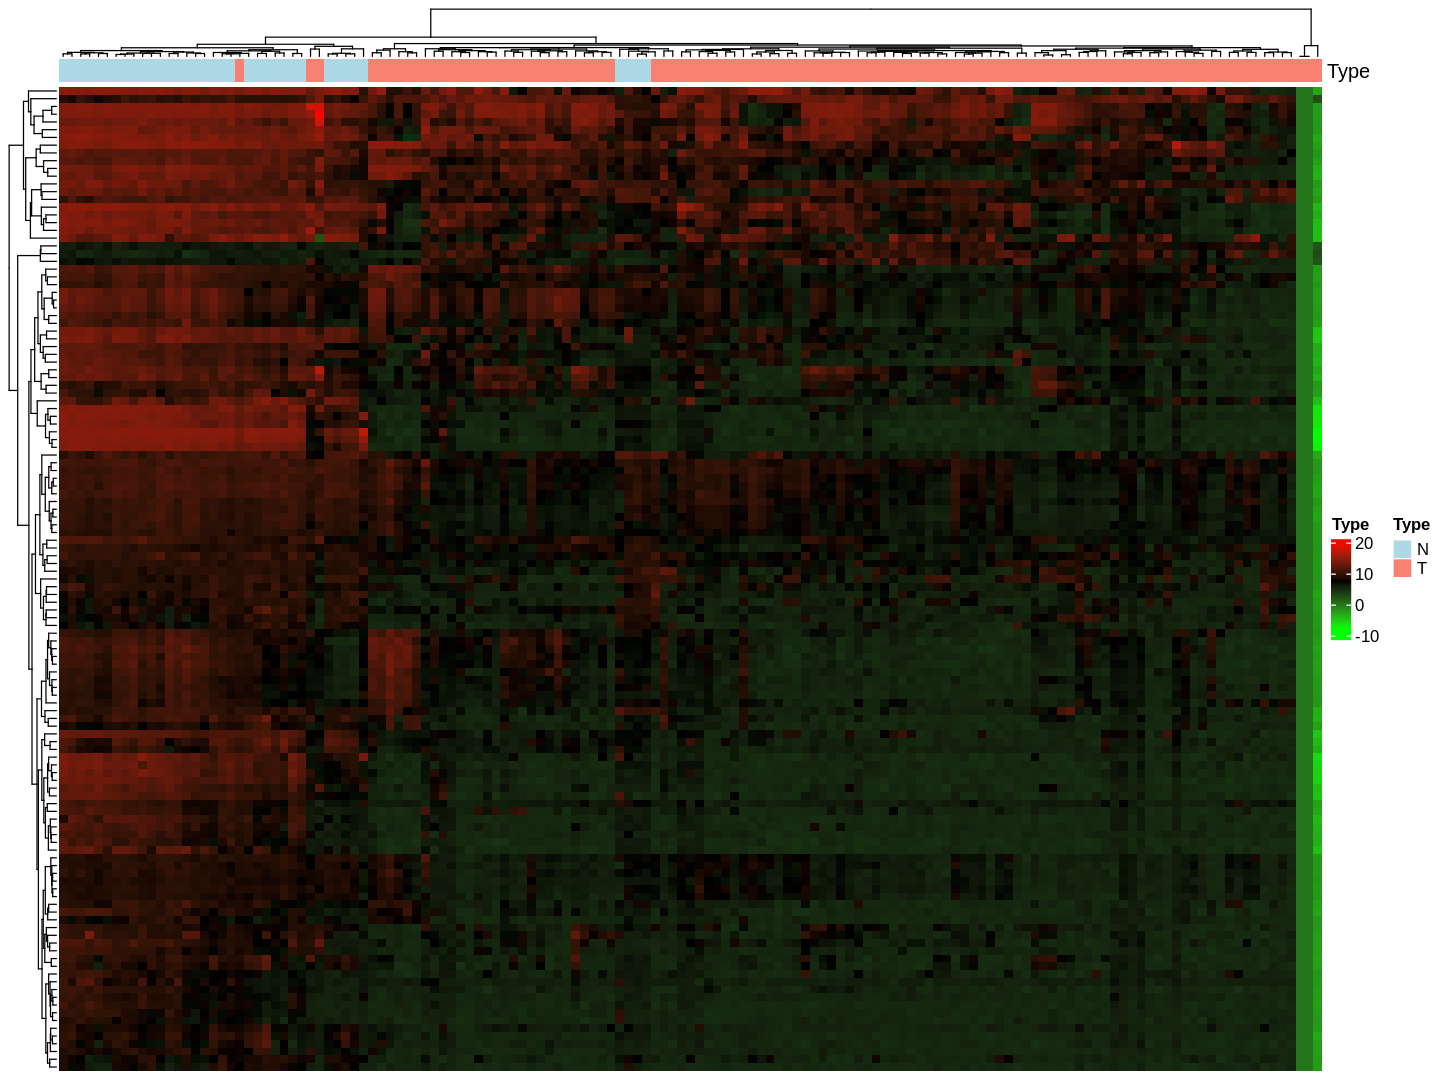

In [37]:
allc_matrix <- as.matrix(allc[rownames(df_DEGs), colnames(allc)])  # Ensure matching columns

# Define a custom color palette (Green-Black-Red)
col_fun <- colorRamp2(c(min(allc_matrix), mean(allc_matrix), max(allc_matrix)),
                      c("green", "black", "red"))

# Ensure 'Label' corresponds to columns (samples), not rows (genes)
sample_labels <- ifelse(colnames(allc) %in% normal_samples, 0, 1)

# Convert sample_labels (0,1) to "N" (Normal) and "T" (Tumor)
sample_types <- ifelse(sample_labels == 0, "N", "T")

# Define annotation colors
ann_colors <- c("N" = "lightblue", "T" = "salmon")

# Create top annotation bar
top_annotation <- HeatmapAnnotation(Type = sample_types,
                                    col = list(Type = ann_colors))

# Generate heatmap with the new color scale
Heatmap(allc_matrix, name = "Type", col = col_fun,
        top_annotation = top_annotation,
        show_column_names = FALSE, show_row_names = FALSE)

# Random Forest

Random Forest (RF) is a widely used machine-learning algorithm for feature selection in gene screening. When applied to gene expression data, it helps identify characteristic genes that differentiate between conditions (e.g., healthy vs. disease).

In [38]:
# Transpose the dataframe
df_t <- t(df_DEGs)

# Get row names
row_names <- rownames(df_t)

# Create a new column 'Label' where normal = 0, aml = 1
df_t <- data.frame(df_t, Label = ifelse(row_names %in% normal_samples, 0, 1))

head(df_t)

,ALAS2,ALDH1A1,ANXA3,APOC1,APOE,ARG1,ASPM,ATF3,AURKB,AVP,⋯,TGFBI,TIMD4,TK1,TOP2A,TROAP,UBE2C,VCAM1,VPREB1,VPREB3,Label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM601375,8.242718,6.523182,5.624303,5.991747,7.438596,6.449650,5.623121,9.637573,5.134312,7.493753,⋯,7.025678,6.708792,5.970814,5.815837,5.002904,5.195720,6.134292,7.669836,6.574378,1
GSM601376,8.167293,6.725047,5.524299,6.061146,6.285121,6.389142,6.873360,8.468161,7.245959,6.401320,⋯,7.291499,5.863402,8.255104,8.285889,6.725664,7.499120,6.204608,5.506135,6.632704,1
GSM601377,8.178867,6.784738,5.161695,6.169464,6.123486,6.083034,6.073647,8.833059,6.702209,7.207431,⋯,7.263744,6.070379,7.054875,6.721006,6.739281,6.510073,6.112467,10.221671,6.681829,1
GSM601378,8.340562,6.576542,5.749714,6.334850,6.269276,6.479994,5.675765,8.615374,5.226280,6.213024,⋯,7.091746,6.207450,7.339707,5.697615,5.178842,5.508602,5.896539,4.889991,6.306527,1
GSM601379,8.389959,6.367951,5.454197,6.688819,7.125062,6.481521,6.013059,6.916098,6.775406,6.065261,⋯,7.121761,6.133143,7.866246,7.112082,6.061774,6.959790,5.800720,10.275409,7.488213,1
GSM601380,8.152729,6.273290,5.584984,6.110509,7.058121,6.501129,7.019452,8.155303,7.959099,6.504507,⋯,7.039789,5.573608,8.731664,8.371281,7.465954,8.225052,5.848765,13.065079,10.240736,1


In [94]:
df_t$Label <- as.factor(df_t$Label)

# Split data into training and testing
set.seed(123)
train_index <- sample(1:nrow(df_t), size = 0.75 * nrow(df_t))
train_data <- df_t[train_index, ]
test_data <- df_t[-train_index, ]

# Train Random Forest model
rf_model <- randomForest(Label ~ ., data = train_data, ntree = 500, importance = TRUE)

## Random Forest Error Rates plot

One of the key outputs in RF-based feature selection is the Error Rates Plot, which visualizes the classification performance as the number of trees increases.

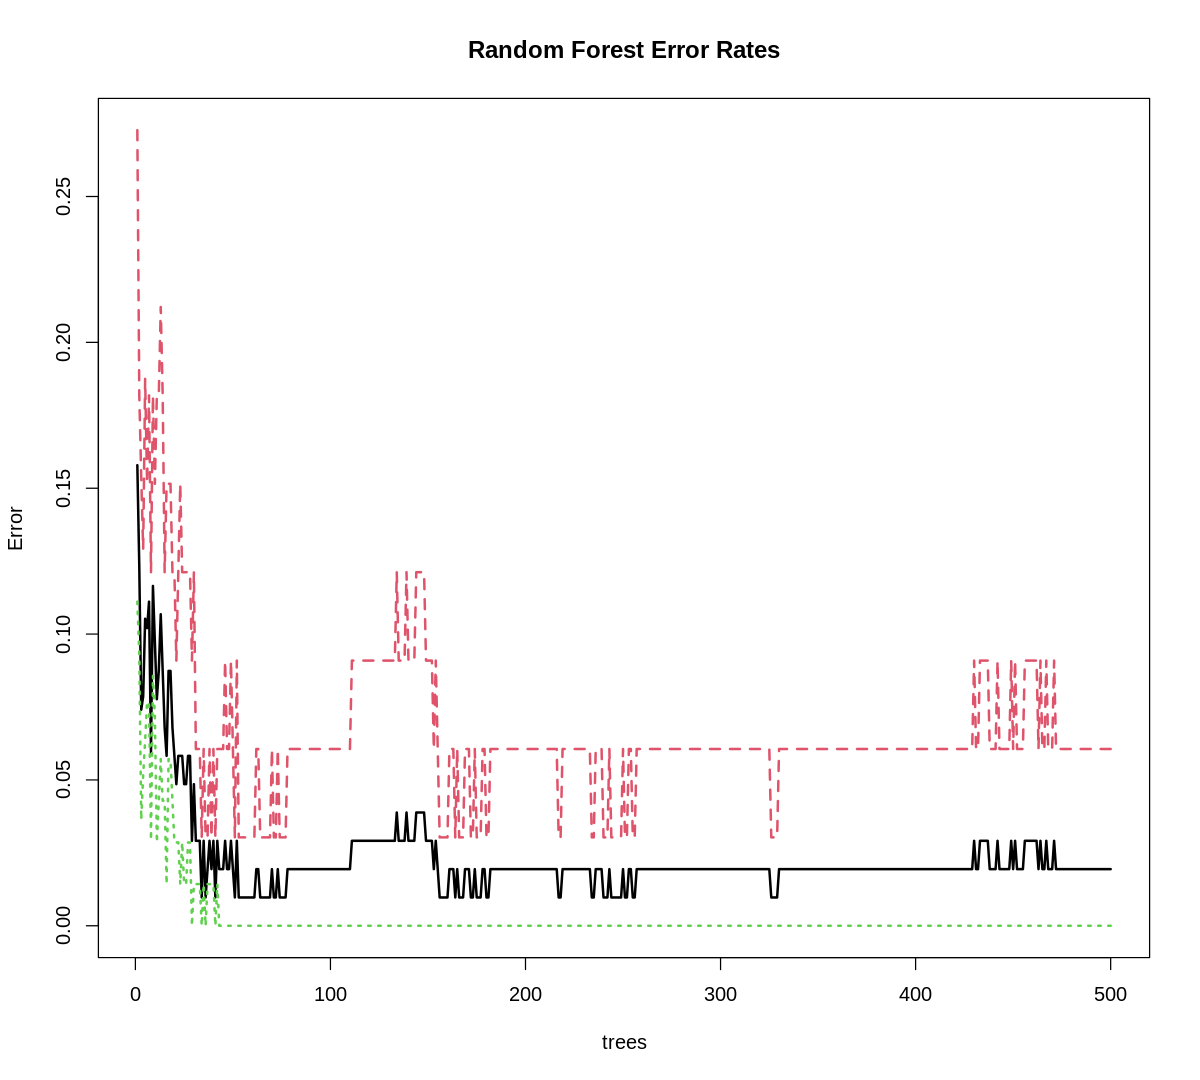

In [95]:
# Plot Error Rates
options(repr.plot.width = 10, repr.plot.height = 9)
plot(rf_model, main = "Random Forest Error Rates", lwd = 2)

###Understanding the Random Forest Error Rates Plot
- **X-axis: Number of Trees**

 - Represents how many decision trees are included in the ensemble model.
As more trees are added, the error should stabilize or decrease.
- **Y-axis: Classification Error Rate**

 - Measures the proportion of misclassified samples.
Typically reported for Overall Error, Class-Specific Error (e.g., case vs. control).


### Key Features of the Plot

- **Overall Trend**
 - At the beginning (few trees), the error rate is high due to model instability.
As trees are added, the error stabilizes (converges to a lower value).

- **Plateau Effect**
 - Once a certain number of trees is reached, adding more trees does not significantly reduce the error rate.
The plateau indicates the optimal number of trees.

- **Class-Specific Error Rates**
 - The plot may show error rates for different classes separately.
If one class has a higher error, it suggests class imbalance or lower model performance for that group.

- **Overfitting Detection**
 - If error increases after a certain number of trees, it may indicate overfitting.
However, Random Forest is generally resistant to overfitting compared to single decision trees.

## Mean Decrease Gini

#### Mean Decrease Impurity is a way to measure how much each gene (or feature) helps in organizing our data. The word “impurity” means how mixed up or messy things are. If a **gene** (or feature) helps separate the data into **cleaner** and more organized groups, it gets a **higher** “Mean Decrease Impurity” score.

In [96]:
# Extract Feature Importance (Mean Decrease Gini)
importance <- importance(rf_model)
var_importance <- data.frame(Feature = rownames(importance), MeanDecreaseGini = importance[, "MeanDecreaseGini"])
var_importance[var_importance$MeanDecreaseGini > 1, ]

,Feature,MeanDecreaseGini
,<chr>,<dbl>
CEACAM1,CEACAM1,1.369865
CEACAM6,CEACAM6,1.489192
CLC,CLC,1.089198
COL17A1,COL17A1,1.532391
CYP4F3,CYP4F3,1.036981
DEFA1,DEFA1,1.200375
DEFA3,DEFA3,2.026048
LCN2,LCN2,2.836649
LOC653600,LOC653600,1.754060


## Mean Decrease Gini plot

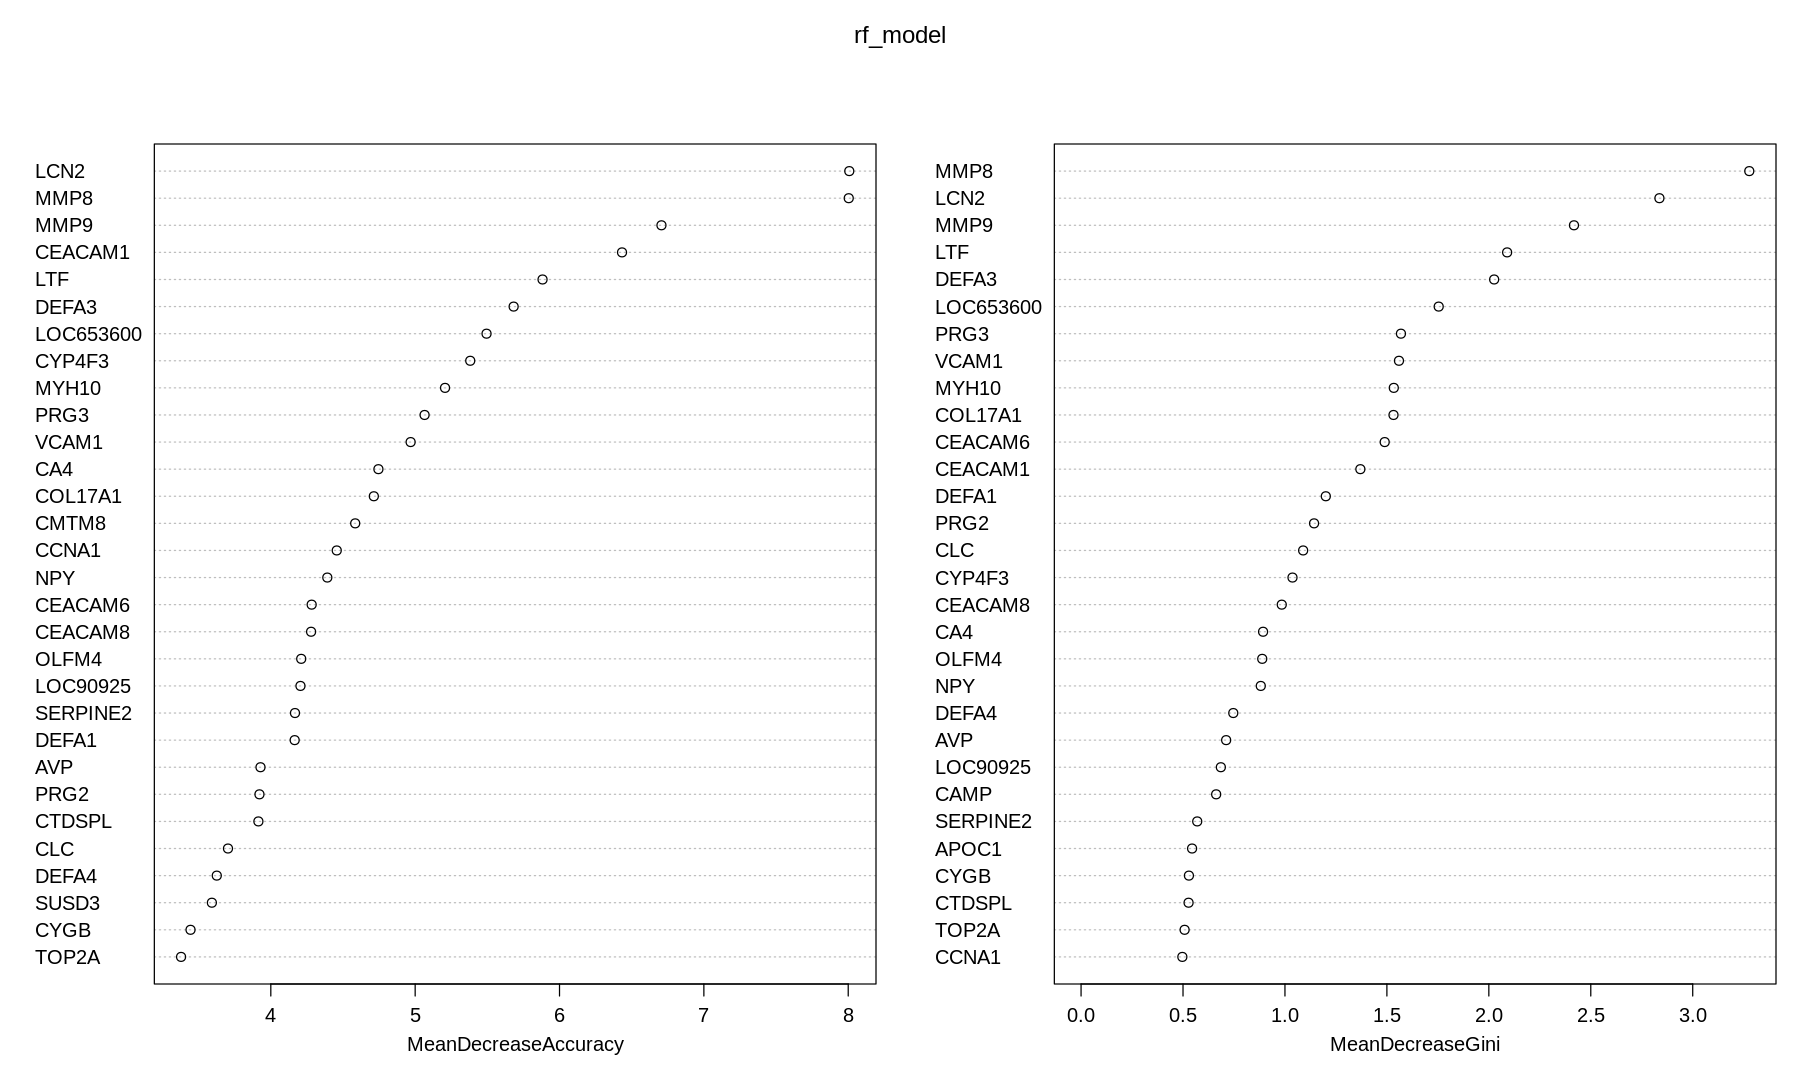

In [97]:
options(repr.plot.width = 15, repr.plot.height = 9)
varImpPlot(rf_model, main = "rf_model")

## AUC plot
AUC is the area under the ROC curve, which plots True Positive Rate (TPR, Sensitivity) vs. False Positive Rate (FPR, 1 - Specificity) at different classification thresholds.

- Higher AUC means better classification performance:
 - AUC = 1.0: Perfect classifier.
 - AUC > 0.9: Excellent classifier.
 - AUC = 0.5: Random chance (no discrimination).

What Does the ROC Curve Show?

- X-axis: False Positive Rate `(FPR) = FP / (FP + TN)`
- Y-axis: True Positive Rate `(TPR) = TP / (TP + FN)`
- The curve represents how the classification threshold affects model performance.

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Warning message in ci.auc.roc(roc_lcn2):
“ci.auc() of a ROC curve with AUC == 1 is always 1-1 and can be misleading.”


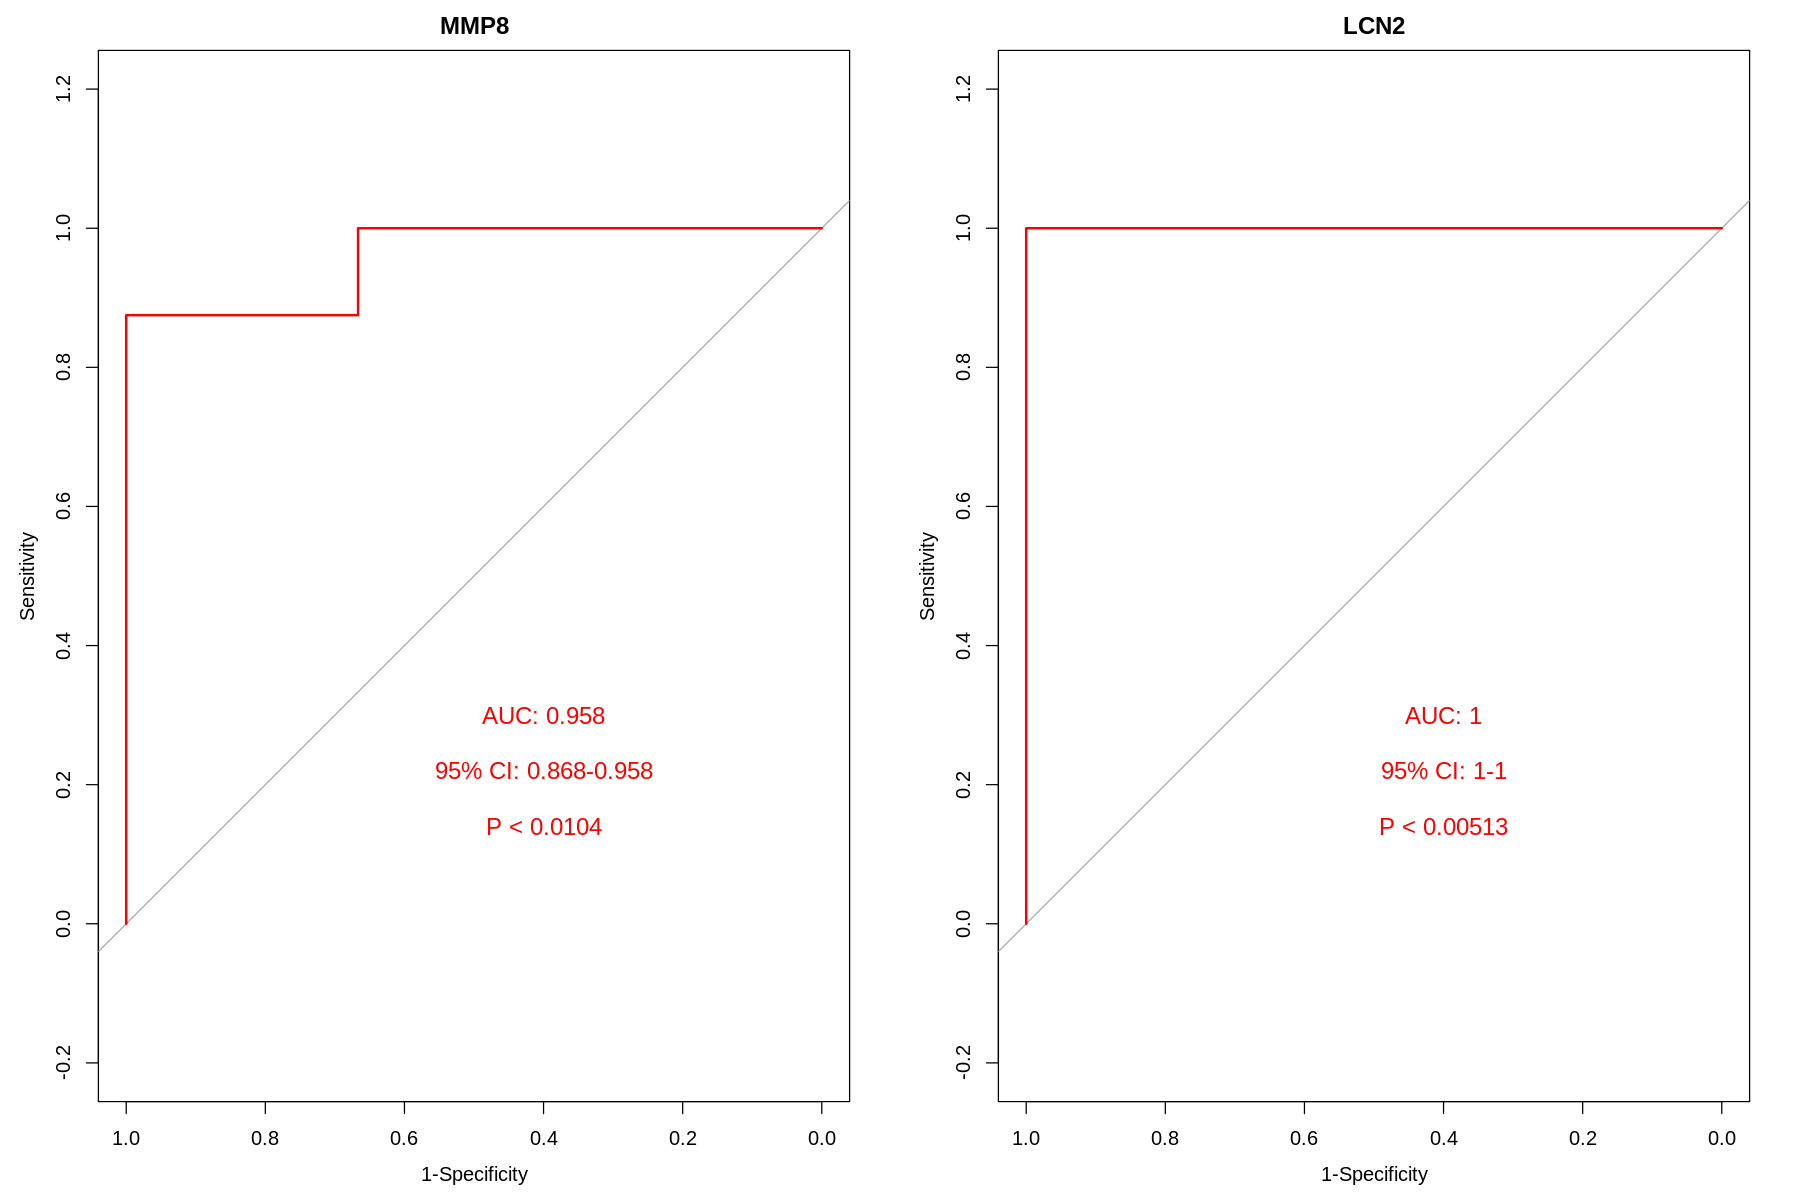

In [98]:
# Compute ROC curves
roc_mmp8 <- roc(test_data$Label, test_data$MMP8)
roc_lcn2 <- roc(test_data$Label, test_data$LCN2)

# Calculate 95% CI for AUC
ci_mmp8 <- round(ci.auc(roc_mmp8)[c(1,2)], 3)  # Extract lower and upper bound
ci_lcn2 <- round(ci.auc(roc_lcn2)[c(1,2)], 3)    # Extract lower and upper bound

# Compute P-values using Wilcoxon test (to test against AUC = 0.5)
pval_mmp8 <- wilcox.test(test_data$MMP8 ~ test_data$Label, exact = FALSE)$p.value
pval_lcn2 <- wilcox.test(test_data$LCN2 ~ test_data$Label, exact = FALSE)$p.value

# Set up two plots side by side
par(mfrow = c(1, 2), mar = c(5, 5, 3, 2))
options(repr.plot.width = 15, repr.plot.height = 10)

# Plot ROC Curve for MMP8
plot(roc_mmp8, col = "red", lwd = 2, main = "MMP8", print.auc = FALSE,
     xlab = "1-Specificity", ylab = "Sensitivity") # , xlim = c(0, 1), ylim = c(0, 1)
# abline(0, 1, col = "gray", lwd = 1, lty = 2)
text(0.4, 0.3, paste0("AUC: ", round(auc(roc_mmp8), 3)), col = "red", cex = 1.2)
text(0.4, 0.22, paste0("95% CI: ", ci_mmp8[1], "-", ci_mmp8[2]), col = "red", cex = 1.2)
text(0.4, 0.14, paste0("P < ", format.pval(pval_mmp8, digits = 3, eps = 0.001)), col = "red", cex = 1.2)

# Plot ROC Curve for LNC2
plot(roc_lcn2, col = "red", lwd = 2, main = "LCN2", print.auc = FALSE,
     xlab = "1-Specificity", ylab = "Sensitivity") # , xlim = c(0, 1), ylim = c(0, 1)
# abline(0, 1, col = "gray", lwd = 1, lty = 2)
text(0.4, 0.3, paste0("AUC: ", round(auc(roc_lcn2), 3)), col = "red", cex = 1.2)
text(0.4, 0.22, paste0("95% CI: ", ci_lcn2[1], "-", ci_lcn2[2]), col = "red", cex = 1.2)
text(0.4, 0.14, paste0("P < ", format.pval(pval_lcn2, digits = 3, eps = 0.001)), col = "red", cex = 1.2)

### Confidence Interval (CI 95%) in AUC
- The AUC value is an estimate, and confidence intervals show its uncertainty.
- The 95% Confidence Interval (CI) provides a range within which the true AUC is expected to fall 95% of the time.

### P-value in AUC Analysis
The p-value tests whether the AUC is significantly different from 0.5 (random guessing).

- Null Hypothesis (H₀): AUC = 0.5 (no predictive power).
- Alternative Hypothesis (H₁): AUC > 0.5 (better than random).

#### How to Interpret the p-value?
- p < 0.05: Model significantly distinguishes between classes.
- p > 0.05: Model may not be performing better than chance.
- Lower p-values (e.g., p < 0.001) suggest a very strong model.


# Gene Enrichment Analysis

**What is Gene Enrichment Analysis?**
- It assesses whether a particular set of genes (e.g., differentially expressed genes) is significantly associated with known biological functions, pathways, or molecular mechanisms.
- Typically performed after a gene expression study (e.g., RNA-seq, microarrays).
Uses statistical tests to determine if certain functional categories occur more often than expected by chance.

## Gene Ontology (GO) Enrichment Analysis
Gene Ontology is a structured framework describing *gene function* using three major categories:

* Biological Process (**BP**) – Pathways and biological objectives a gene contributes to (e.g., apoptosis, DNA replication).
* Molecular Function (**MF**) – The biochemical activity of a gene product (e.g., kinase activity, DNA binding).
* Cellular Component (**CC**) – The location in the cell where the gene product functions (e.g., mitochondrion, nucleus).



In [44]:
# Sort and select top genes
genes_to_test <- rownames(analys_DEGs)

# Perform GO enrichment analysis for BP, CC, and MF categories
Go_result_BP <- enrichGO(gene = genes_to_test, OrgDb = org.Hs.eg.db, keyType = "SYMBOL", ont = "BP",
                         pAdjustMethod = "BH", pvalueCutoff = 0.05, qvalueCutoff = 0.05) %>% as.data.frame()
Go_result_CC <- enrichGO(gene = genes_to_test, OrgDb = org.Hs.eg.db, keyType = "SYMBOL", ont = "CC",
                         pAdjustMethod = "BH", pvalueCutoff = 0.05, qvalueCutoff = 0.05) %>% as.data.frame()
Go_result_MF <- enrichGO(gene = genes_to_test, OrgDb = org.Hs.eg.db, keyType = "SYMBOL", ont = "MF",
                         pAdjustMethod = "BH", pvalueCutoff = 0.05, qvalueCutoff = 0.05) %>% as.data.frame()

# Add ontology category labels
Go_result_BP$Ontology <- "BP"
Go_result_CC$Ontology <- "CC"
Go_result_MF$Ontology <- "MF"

# Combine all results
Go_result_all <- bind_rows(Go_result_MF, Go_result_CC, Go_result_BP)  # Ordering MF -> CC -> BP
head(Go_result_all, 10)

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count,Ontology
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
GO:0016209,GO:0016209,antioxidant activity,8/108,86/18737,0.09302326,16.138674,10.713751,3.426411e-08,8.977197e-06,7.321699e-06,APOE/CYGB/HBD/HBQ1/HP/MPO/PRDX2/S100A9,8,MF
GO:0005539,GO:0005539,glycosaminoglycan binding,11/108,246/18737,0.04471545,7.757716,8.123494,1.797217e-07,2.354355e-05,1.920185e-05,APOE/AZU1/COL17A1/COL5A1/CTSG/HMMR/LTF/MPO/PGLYRP1/PRG2/SERPINE2,11,MF
GO:0008201,GO:0008201,heparin binding,9/108,176/18737,0.05113636,8.871686,7.988752,8.172736e-07,7.137523e-05,5.821282e-05,APOE/AZU1/COL17A1/COL5A1/CTSG/LTF/MPO/PRG2/SERPINE2,9,MF
GO:0004601,GO:0004601,peroxidase activity,5/108,57/18737,0.08771930,15.218486,8.185739,1.912040e-05,1.058252e-03,8.630981e-04,CYGB/HBD/HBQ1/MPO/PRDX2,5,MF
GO:0016684,GO:0016684,"oxidoreductase activity, acting on peroxide as acceptor",5/108,59/18737,0.08474576,14.702605,8.026376,2.265359e-05,1.058252e-03,8.630981e-04,CYGB/HBD/HBQ1/MPO/PRDX2,5,MF
GO:0046906,GO:0046906,tetrapyrrole binding,7/108,153/18737,0.04575163,7.937485,6.560451,2.951898e-05,1.058252e-03,8.630981e-04,CYGB/CYP4F3/HBD/HBQ1/HMOX1/MPO/TCN1,7,MF
GO:0050786,GO:0050786,RAGE receptor binding,3/108,11/18737,0.27272727,47.315657,11.699228,2.971279e-05,1.058252e-03,8.630981e-04,S100A12/S100A8/S100A9,3,MF
GO:1901681,GO:1901681,sulfur compound binding,9/108,277/18737,0.03249097,5.636883,5.919782,3.231303e-05,1.058252e-03,8.630981e-04,APOE/AZU1/COL17A1/COL5A1/CTSG/LTF/MPO/PRG2/SERPINE2,9,MF
GO:0005344,GO:0005344,oxygen carrier activity,3/108,14/18737,0.21428571,37.176587,10.310018,6.472685e-05,1.884270e-03,1.536789e-03,CYGB/HBD/HBQ1,3,MF


### GO Enrichment Output Interpretation
- **GO Term ID**: Unique identifier for a GO category (e.g., GO:0006915 for apoptosis).
- **Term Name**: Description of the function/pathway.
- **p-value/FDR**: Measures statistical significance.
- **Gene Count**: Number of genes from input associated with the term.
- **Enrichment Score (log10 p-value or z-score)**: Indicates strength of enrichment.


### Visualization
Displays the most significantly enriched GO terms ranked by p-value or gene count:

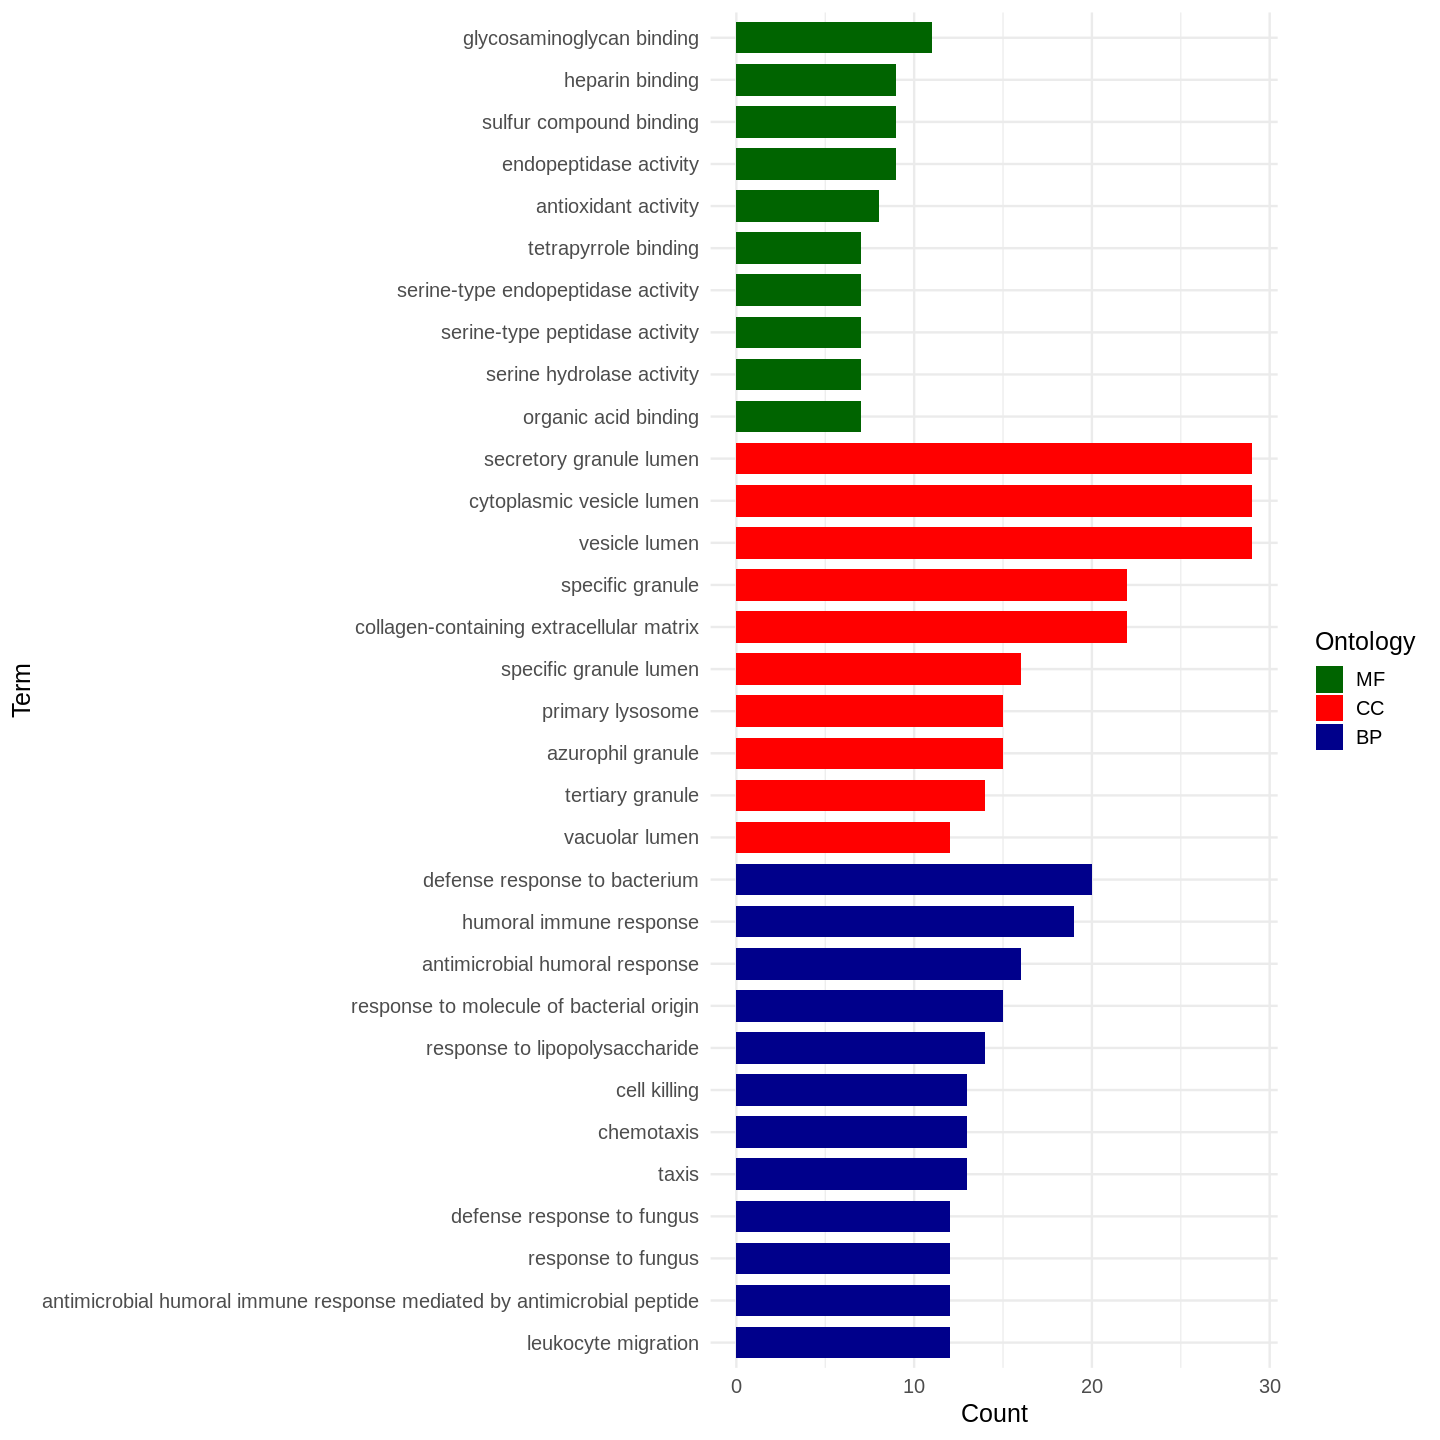

In [45]:
# Select the top terms from each category (adjust number based on visualization needs)
top_terms <- Go_result_all %>%
  group_by(Ontology) %>%
  top_n(10, Count) %>%  # Take top 10 for each ontology
  ungroup()

# Order terms so that MF terms appear first, followed by CC, and then BP
top_terms$Ontology <- factor(top_terms$Ontology, levels = c("MF", "CC", "BP"))  # Ensure correct order
top_terms <- top_terms %>%arrange(Ontology, desc(Count))  # Sort within each category
top_terms$Description <- factor(top_terms$Description, levels = rev(unique(top_terms$Description)))  # Maintain order in plot

# Plot using ggplot2
options(repr.plot.width = 12, repr.plot.height = 12)
ggplot(top_terms, aes(x = Description, y = Count, fill = Ontology)) +
  geom_bar(stat = "identity", width = 0.75) +
  coord_flip() +
  scale_fill_manual(values = c("MF" = "darkgreen", "CC" = "red", "BP" = "darkblue")) +
  labs(x = "Term", y = "Count", fill = "Ontology") +
  theme_minimal(base_size = 15) +
  theme(legend.position = "right")

## Pathway Enrichment Analysis By ENRICHR
Enrichr compares a provided gene list to curated gene sets from various biological databases. It calculates enrichment scores, p-values, and adjusted p-values (FDR) to determine significantly associated pathways.

- Metabolism (e.g., glycolysis, TCA cycle)
- Genetic Information Processing (e.g., DNA replication)
- Environmental Information Processing (e.g., signaling pathways)
- Cellular Processes (e.g., cell cycle)
- Human Diseases (e.g., cancer, neurodegenerative diseases)

In [59]:
dbs <- c("Reactome_Pathways_2024","BioPlanet_2019","KEGG_2021_Human","Panther_2016")
down <- down_DEGs %>% arrange(FDR)
up <- up_DEGs
genes <- c(rownames(up), rownames(down))
genes <- genes[1:40]
enrich_results <- enrichr(genes, dbs)
kegg <- enrich_results$KEGG_2021_Human
reactome <- enrich_results$Reactome_Pathways_2024
bio <- enrich_results$BioPlanet_2019
panther <- enrich_results$Panther_2016

Uploading data to Enrichr... Done.
  Querying Reactome_Pathways_2024... Done.
  Querying BioPlanet_2019... Done.
  Querying KEGG_2021_Human... Done.
  Querying Panther_2016... Done.
Parsing results... Done.


In [60]:
kegg <- kegg %>%
  separate(Overlap, into = c("Gene_Count", "Total_Genes"), sep = "/", convert = TRUE)
# Convert Gene_Count to numeric
kegg$Gene_Count <- as.numeric(kegg$Gene_Count)
head(kegg)

,Term,Gene_Count,Total_Genes,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
1,Transcriptional misregulation in cancer,4,192,0.0005741012,0.02302755,0,0,11.685579,87.20603,CCNA1;DEFA3;DEFA1;MMP9
2,Staphylococcus aureus infection,3,95,0.0009030412,0.02302755,0,0,17.509988,122.74051,DEFA3;DEFA1;CAMP
3,Cell cycle,3,124,0.0019439010,0.03304632,0,0,13.293947,82.99489,CDC20;CCNB2;CCNA1
4,Cholesterol metabolism,2,50,0.0044964248,0.05732942,0,0,21.833333,117.99765,APOC1;APOE
5,NOD-like receptor signaling pathway,3,181,0.0056325457,0.05745197,0,0,9.010932,46.66936,DEFA3;DEFA1;CAMP
6,Human T-cell leukemia virus 1 infection,3,219,0.0094973285,0.08072729,0,0,7.411411,34.51305,CDC20;CCNB2;CCNA1


In [61]:
reactome <- reactome %>%
  separate(Overlap, into = c("Gene_Count", "Total_Genes"), sep = "/", convert = TRUE)

# Convert Gene_Count to numeric
reactome$Gene_Count <- as.numeric(reactome$Gene_Count)
head(reactome)

,Term,Gene_Count,Total_Genes,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
1,"Cell Cycle, Mitotic",8,516,6.911631e-06,0.001283915,0,0,9.572835,113.74734,TOP2A;CDC20;CCNB2;CCNA1;UBE2C;CDCA5;HMMR;AURKB
2,APC C-mediated Degradation of Cell Cycle Proteins,4,75,1.504588e-05,0.001283915,0,0,31.125196,345.62681,CDC20;CCNA1;UBE2C;AURKB
3,Regulation of Mitotic Cell Cycle,4,75,1.504588e-05,0.001283915,0,0,31.125196,345.62681,CDC20;CCNA1;UBE2C;AURKB
4,Cell Cycle,8,649,3.612122e-05,0.001960497,0,0,7.534711,77.06977,TOP2A;CDC20;CCNB2;CCNA1;UBE2C;CDCA5;HMMR;AURKB
5,Antimicrobial Peptides,4,95,3.829095e-05,0.001960497,0,0,24.260073,246.73215,LCN2;DEFA3;DEFA1;CAMP
6,Mitotic Anaphase,5,221,7.559966e-05,0.002824368,0,0,13.058201,123.92310,CDC20;CCNB2;UBE2C;CDCA5;AURKB


In [62]:
panther <- panther %>%
  separate(Overlap, into = c("Gene_Count", "Total_Genes"), sep = "/", convert = TRUE)

# Convert Gene_Count to numeric
panther$Gene_Count <- as.numeric(panther$Gene_Count)
head(panther)

,Term,Gene_Count,Total_Genes,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
1,Serine glycine biosynthesis Homo sapiens P02776,1,6,0.01194153,0.09708397,0,0,102.33333,453.10467,PHGDH
2,Vasopressin synthesis Homo sapiens P04395,1,10,0.01982523,0.09708397,0,0,56.84046,222.86006,AVP
3,Plasminogen activating cascade Homo sapiens P00050,1,15,0.02959365,0.09708397,0,0,36.53114,128.59674,MMP9
4,Opioid prodynorphin pathway Homo sapiens P05916,1,18,0.03540907,0.09708397,0,0,30.07994,100.49068,AVP
5,DNA replication Homo sapiens P00017,1,19,0.03733999,0.09708397,0,0,28.40741,93.39476,TOP2A
6,Ubiquitin proteasome pathway Homo sapiens P00060,1,43,0.08256762,0.16016307,0,0,12.15995,30.32859,UBE2C


In [63]:
bio <- bio %>%
  separate(Overlap, into = c("Gene_Count", "Total_Genes"), sep = "/", convert = TRUE)
# Convert Gene_Count to numeric
bio$Gene_Count <- as.numeric(bio$Gene_Count)
head(bio)

,Term,Gene_Count,Total_Genes,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
1,APC/C-mediated degradation of cell cycle proteins,4,82,2.143441e-05,0.003751021,0,0,28.321937,304.47536,CDC20;CCNA1;UBE2C;AURKB
2,Alpha defensins,2,9,1.391618e-04,0.010009147,0,0,150.022556,1332.18124,DEFA3;DEFA1
3,T cell receptor regulation of apoptosis,7,603,1.715854e-04,0.010009147,0,0,6.891804,59.75490,TOP2A;CDC20;CCNB2;PRDX2;SERPINE2;SCD;ATF3
4,Cell cycle,6,453,2.609357e-04,0.011415937,0,0,7.703514,63.56351,TOP2A;CDC20;CCNB2;CCNA1;UBE2C;AURKB
5,Cyclin A/B1-associated events during G2/M transition,2,15,4.028203e-04,0.014098711,0,0,80.757085,631.27975,CCNA1;CCNB2
6,APC/C activator regulation between G1/S and early anaphase,2,21,7.995518e-04,0.018354638,0,0,55.238227,393.92917,CDC20;UBE2C


In [64]:
kegg <- kegg[1:7, ]
kegg$Source <- "kegg"
kegg <- kegg[, c("Term", "Adjusted.P.value", "Source", "Gene_Count")]
reactome <- reactome[1:7, ]
reactome$Source <- "reactome"
reactome <- reactome[, c("Term", "Adjusted.P.value", "Source", "Gene_Count")]
bio <- bio[1:7, ]
bio$Source <- "bio"
bio <- bio[, c("Term", "Adjusted.P.value", "Source", "Gene_Count")]
panther <- panther[1:7, ]
panther$Source <- "panther"
panther <- panther[, c("Term", "Adjusted.P.value", "Source", "Gene_Count")]
combined_df <- rbind(kegg, reactome, panther, bio)
combined_df <- combined_df %>% arrange(Adjusted.P.value)
colnames(combined_df)[colnames(combined_df) == "Adjusted.P.value"] <- "FDR"
combined_df <- na.omit(combined_df)
combined_df <- combined_df %>%
  mutate(Term_lower = tolower(Term)) %>%
  group_by(Term_lower) %>%
  slice_max(order_by = Gene_Count, n = 1) %>%
  ungroup() %>%
  select(-Term_lower)
combined_df <- combined_df %>% arrange(FDR)
head(combined_df)

Term,FDR,Source,Gene_Count
<chr>,<dbl>,<chr>,<dbl>
APC C-mediated Degradation of Cell Cycle Proteins,0.001283915,reactome,4
"Cell Cycle, Mitotic",0.001283915,reactome,8
Regulation of Mitotic Cell Cycle,0.001283915,reactome,4
Antimicrobial Peptides,0.001960497,reactome,4
Cell Cycle,0.001960497,reactome,8
Mitotic Anaphase,0.002824368,reactome,5


### Visualization
provides interactive maps showing highlighted genes within pathways:


Warning message in geom_bar(stat = "identity", with = 0.6):
“Ignoring unknown parameters: `with`”


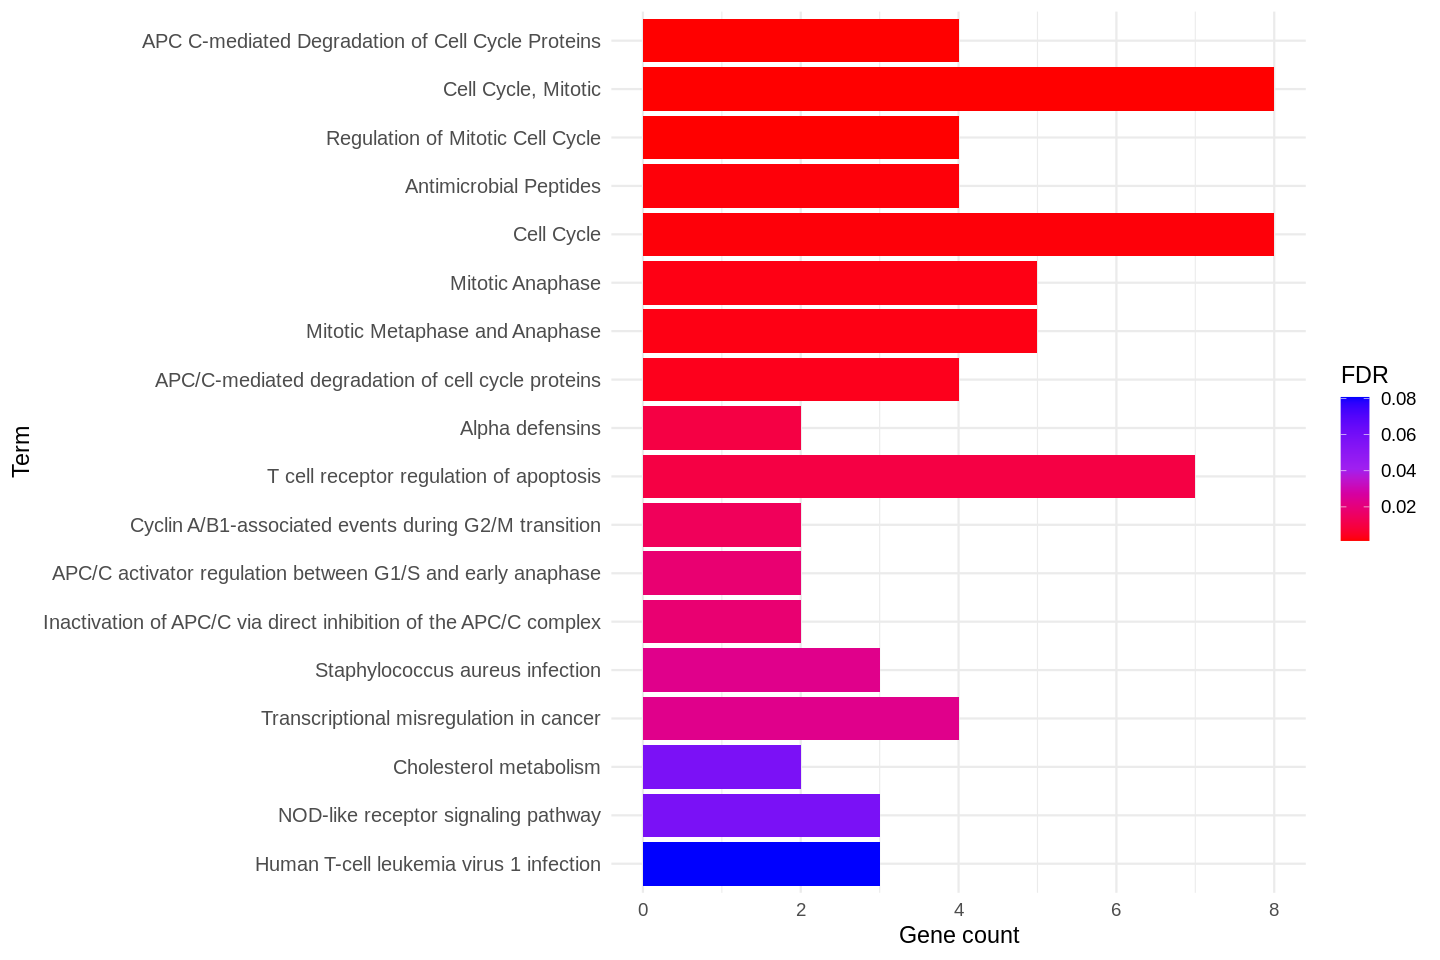

In [69]:
# Order terms for better visualization
combined_df$Term <- factor(combined_df$Term, levels = rev(combined_df$Term))
options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(combined_df[1:18,], aes(x = Gene_Count, y = Term, fill = FDR)) +
  geom_bar(stat = "identity", with=0.6) +
  scale_fill_gradientn(colors = c("red", "purple", "blue")) +  # FDR gradient matching the image
  labs(x = "Gene count", y = "Term", fill = "FDR") +
  theme_minimal(base_size = 14) +
  theme(legend.position = "right",
        axis.text.y = element_text(size = 12, hjust = 1))  # Ensure term labels are readable

# ESTIMATE

In [72]:
filename <- "exp.gct"
expr_df <- cbind(NAME = rownames(all_data), DESCRIPTION = rownames(all_data), all_data[,-1])
cat("#1.2\n", file = filename)  # First line (format version)
cat(nrow(expr_df), "\t", ncol(expr_df) - 2, "\n", file = filename, append = TRUE)  # Dimensions
write.table(expr_df, file = filename, quote = FALSE, sep = "\t", row.names = FALSE, append = TRUE)
estimateScore("exp.gct", "estimate_scores.gct", platform = "illumina")
estimate_results <- read.table("estimate_scores.gct", skip=2, header=TRUE, sep="\t")
estimate_results <- estimate_results[,-1]

colnames(estimate_results)[1] <- "SampleID"
estimate_results_long <- reshape2::melt(estimate_results, id.vars="SampleID")

genes <- c("MMP8","LCN2")
gene_expr <- as.data.frame(t(all_data[genes, ][,-1]))
gene_expr_df <- data.frame(variable = colnames(all_data[,-1]), GeneExpr = gene_expr)

# Merge ESTIMATE scores with gene expression
estimate_gene_df <- merge(estimate_results_long, gene_expr_df, by = "variable")
colnames(estimate_gene_df)[1:3] <- c("SampleID", "ScoreType", "ESTIMATEScore")
colnames(estimate_gene_df) <- gsub("GeneExpr\\.", "", colnames(estimate_gene_df))
estimate_gene_df <- estimate_gene_df %>% filter(ScoreType == "ESTIMATEScore")

# Compute Spearman correlation
correlation_LCN2 <- cor.test(estimate_gene_df$LCN2, estimate_gene_df$ESTIMATEScore,
                        method = "spearman", exact = FALSE)
correlation_MMP8 <- cor.test(estimate_gene_df$MMP8, estimate_gene_df$ESTIMATEScore,
                              method = "spearman", exact = FALSE)

Warning message in write.table(expr_df, file = filename, quote = FALSE, sep = "\t", :
“appending column names to file”


[1] "1 gene set: StromalSignature  overlap= 137"
[1] "2 gene set: ImmuneSignature  overlap= 133"



	Spearman's rank correlation rho

data:  estimate_gene_df$LCN2 and estimate_gene_df$ESTIMATEScore
S = 289973, p-value = 0.0001162
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3233412 



`geom_smooth()` using formula = 'y ~ x'


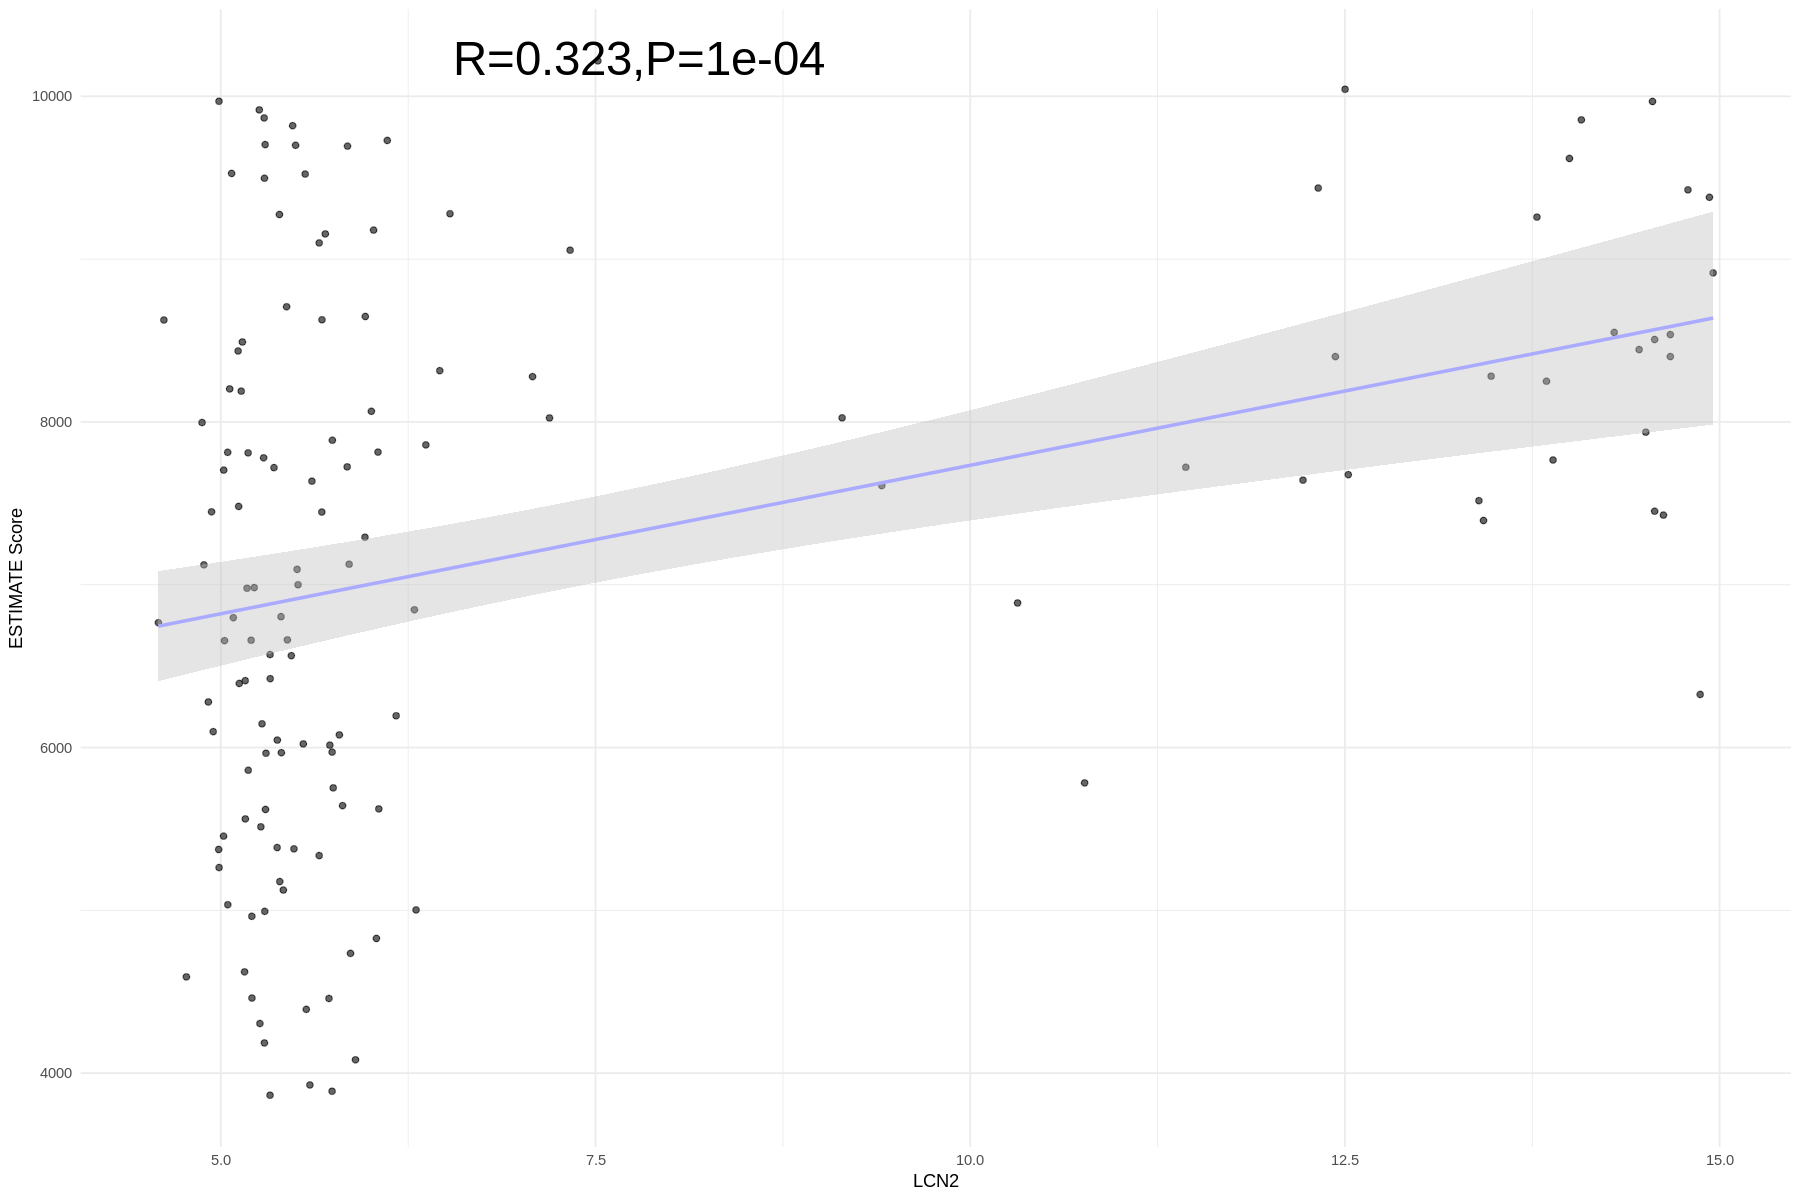

In [111]:
print(correlation_LCN2)
result <- paste0("R=", round(as.numeric(correlation_LCN2$estimate), 3),",","P=", round(as.numeric(correlation_LCN2$p.value), 4))
ggplot(estimate_gene_df, aes(x = LCN2, y = ESTIMATEScore)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "#AAAAFF", fill = "gray", se = T) +
  theme_minimal() +
  labs(x = "LCN2", y = "ESTIMATE Score")+
  annotate("text", x = -Inf, y = Inf, label = result, hjust = -1, vjust = 2, size=10)


	Spearman's rank correlation rho

data:  estimate_gene_df$MMP8 and estimate_gene_df$ESTIMATEScore
S = 298050, p-value = 0.0002973
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3044925 



`geom_smooth()` using formula = 'y ~ x'


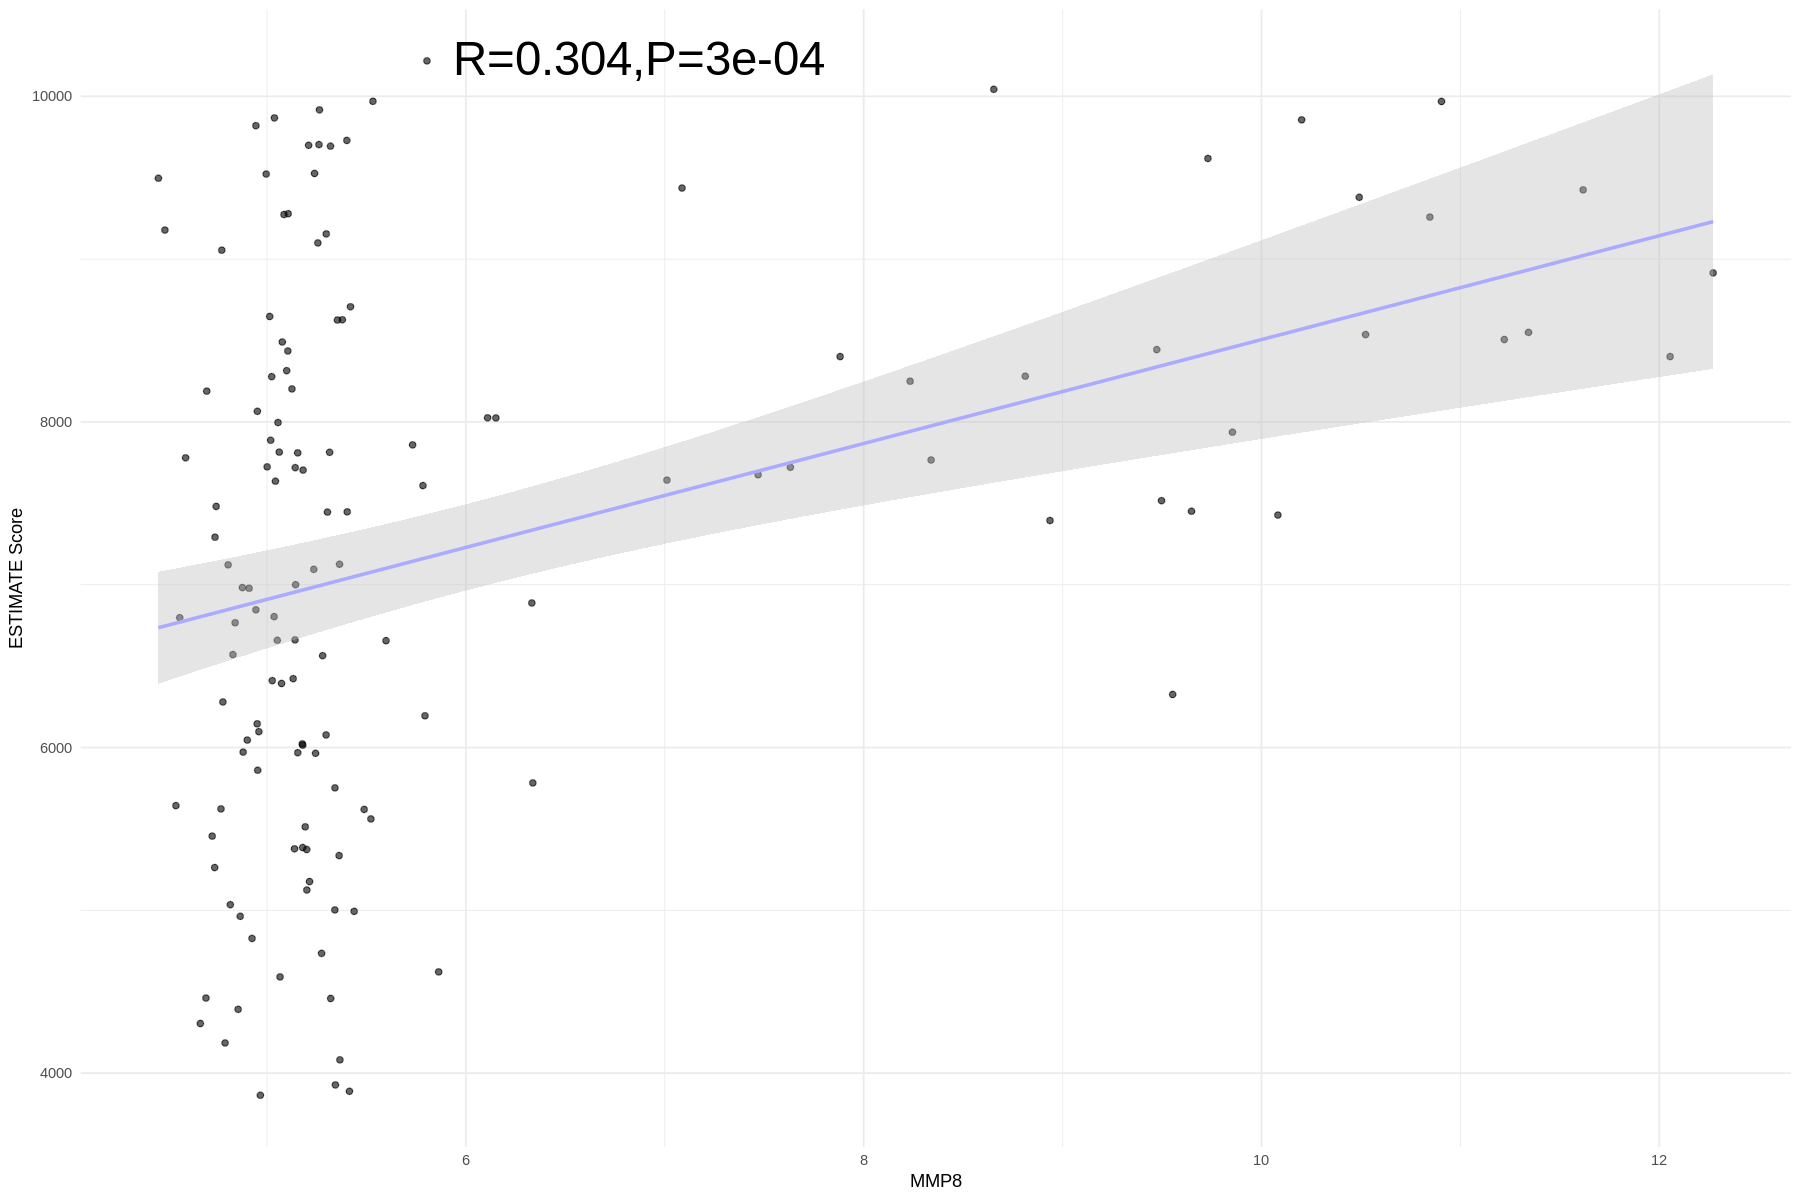

In [110]:
print(correlation_MMP8)
result <- paste0("R=", round(as.numeric(correlation_MMP8$estimate), 3),",","P=", round(as.numeric(correlation_MMP8$p.value), 4))
ggplot(estimate_gene_df, aes(x = MMP8, y = ESTIMATEScore)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "#AAAAFF", fill = "gray", se = T) +
  theme_minimal() +
  labs(x = "MMP8", y = "ESTIMATE Score")+
  annotate("text", x = -Inf, y = Inf, label = result, hjust = -1, vjust = 2, size=10)